# PROBLEM STATEMENT

 ### To predict fraudulent credit card transactions with the help of machine learning models.

In the given data set, we are going to analyse customer-level data that has been collected and build several models using different machine learning algorithms to predict fraudulent credit card transactions. 

### Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('E:\\creditcard\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum().sort_values

<bound method Series.sort_values of Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64>

There are no missing values in the dataset

In [8]:
# to check the distribution of classes in the dataset

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Percentage of non-fraudulent transcations:', normal_share)
print('Percentage of fraudulent transcations:', fraud_share)

Percentage of non-fraudulent transcations: 99.82725143693798
Percentage of fraudulent transcations: 0.1727485630620034


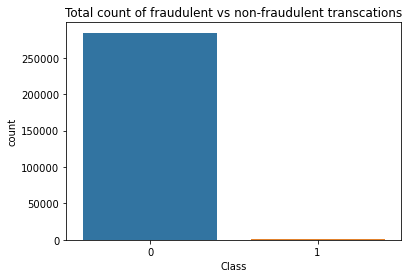

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(x='Class', data=df)
plt.title('Total count of fraudulent vs non-fraudulent transcations')
plt.show()

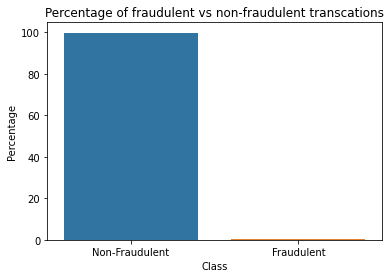

In [10]:
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

The above plot shows that the dataset is highly class imbalance

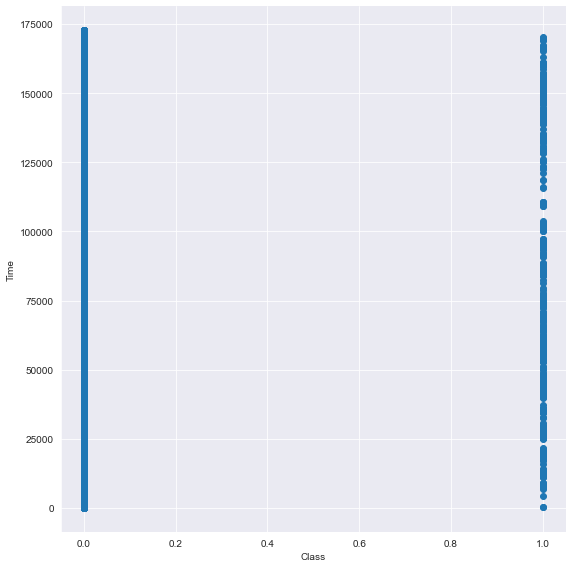

In [11]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("darkgrid")
grid=sns.FacetGrid(df, height = 8)
grid.map(plt.scatter, "Class", "Time")
grid.add_legend()
plt.show()


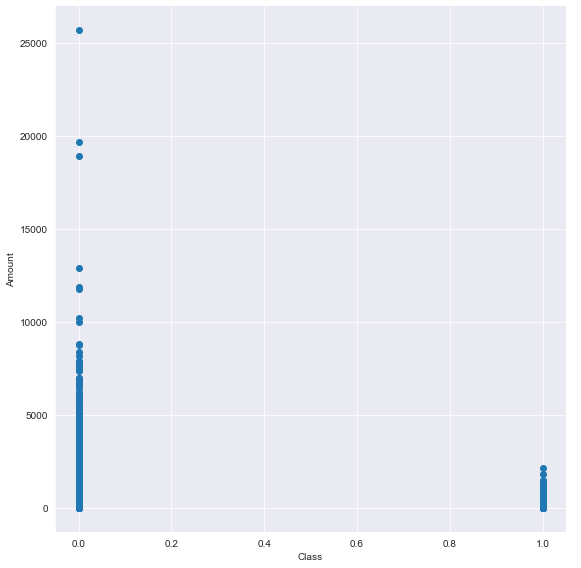

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.set_style("darkgrid")
grid=sns.FacetGrid(df, height = 8)
grid.map(plt.scatter, "Class", "Amount")
grid.add_legend()
plt.show()

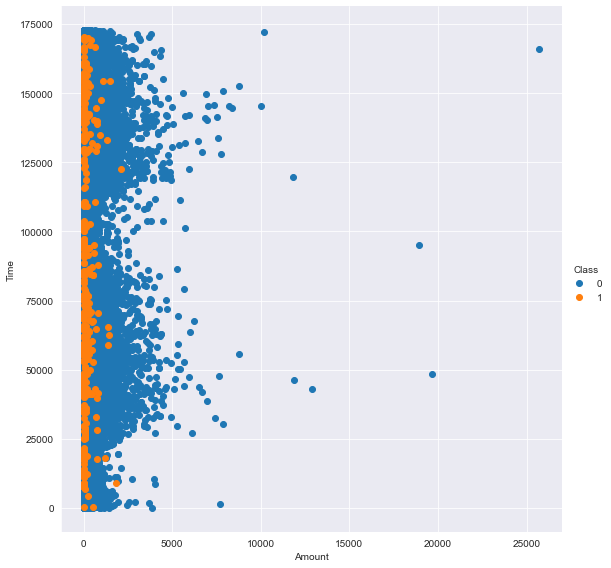

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount and Time

sns.set_style("darkgrid")
grid=sns.FacetGrid(df, hue="Class", height = 8)
grid.map(plt.scatter, "Amount", "Time")
grid.add_legend()
plt.show()

Looks like low amount transactions are more likely to be frauds when compared to high amount.

In [14]:
corr = df.corr()


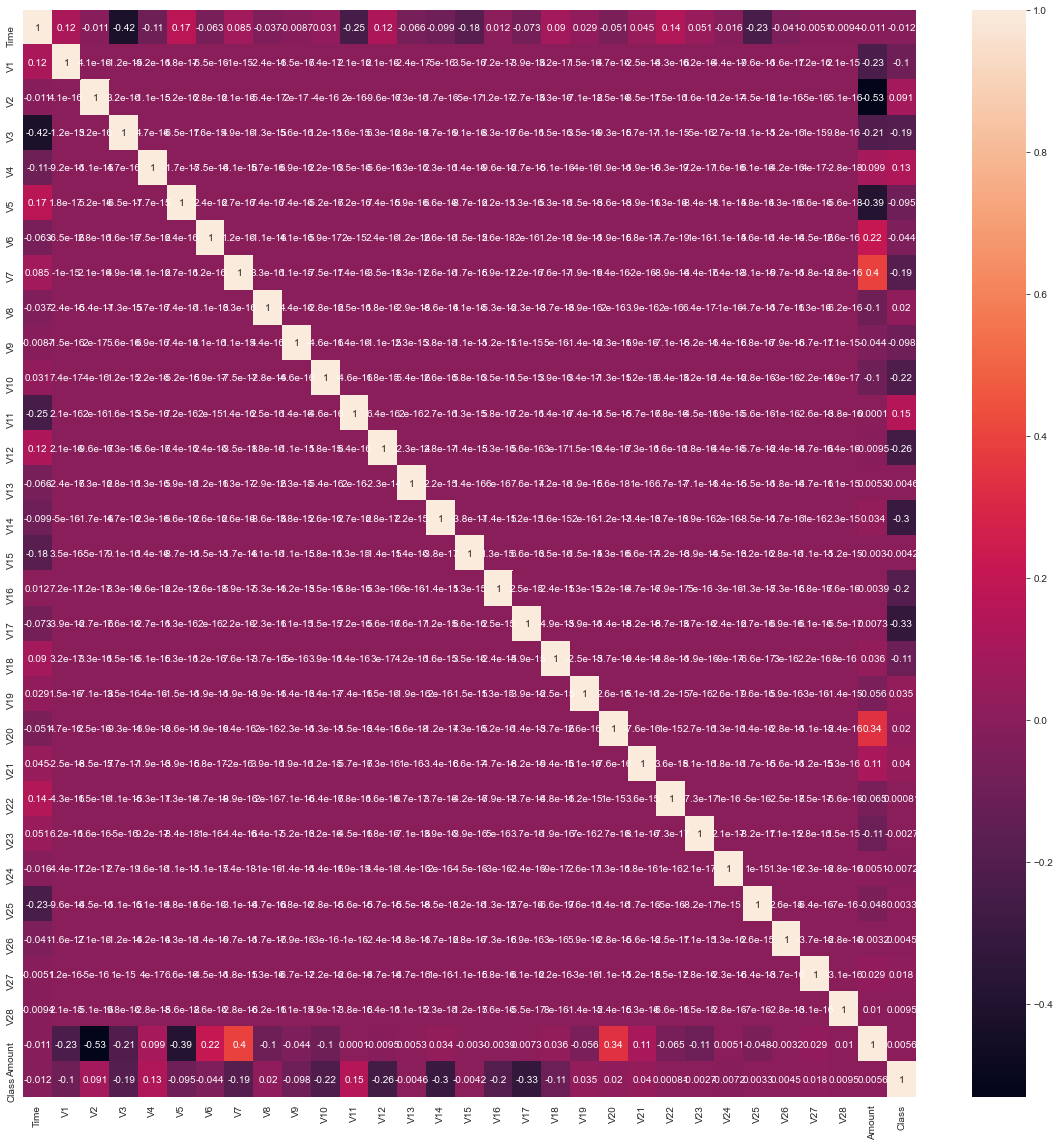

In [15]:
# Lets have a look on the correlation between variables

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

The above heatmap is quite difficult to find its correlation due to more no of variables.

In [16]:
# To drop unnecessary column

df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Train-Test Split

In [17]:
X = df.drop(labels='Class', axis=1)
y = df['Class']

X.shape, y.shape


((284807, 29), (284807,))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [19]:
# To standardize the dataset

from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [20]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [22]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


In [23]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [24]:
# to find out time taken to execute a cell
%load_ext autotime

time: 0 ns (started: 2021-06-14 13:56:44 +05:30)


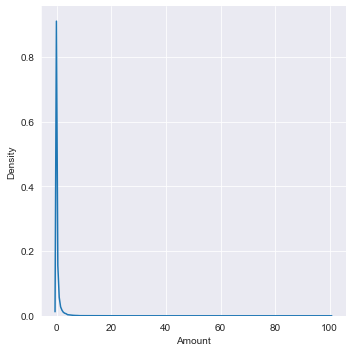

time: 2.53 s (started: 2021-06-14 13:56:44 +05:30)


In [25]:
# plot the histogram of a variable to see the skewness

sns.displot(X_train, x='Amount', kind='kde')
plt.show()

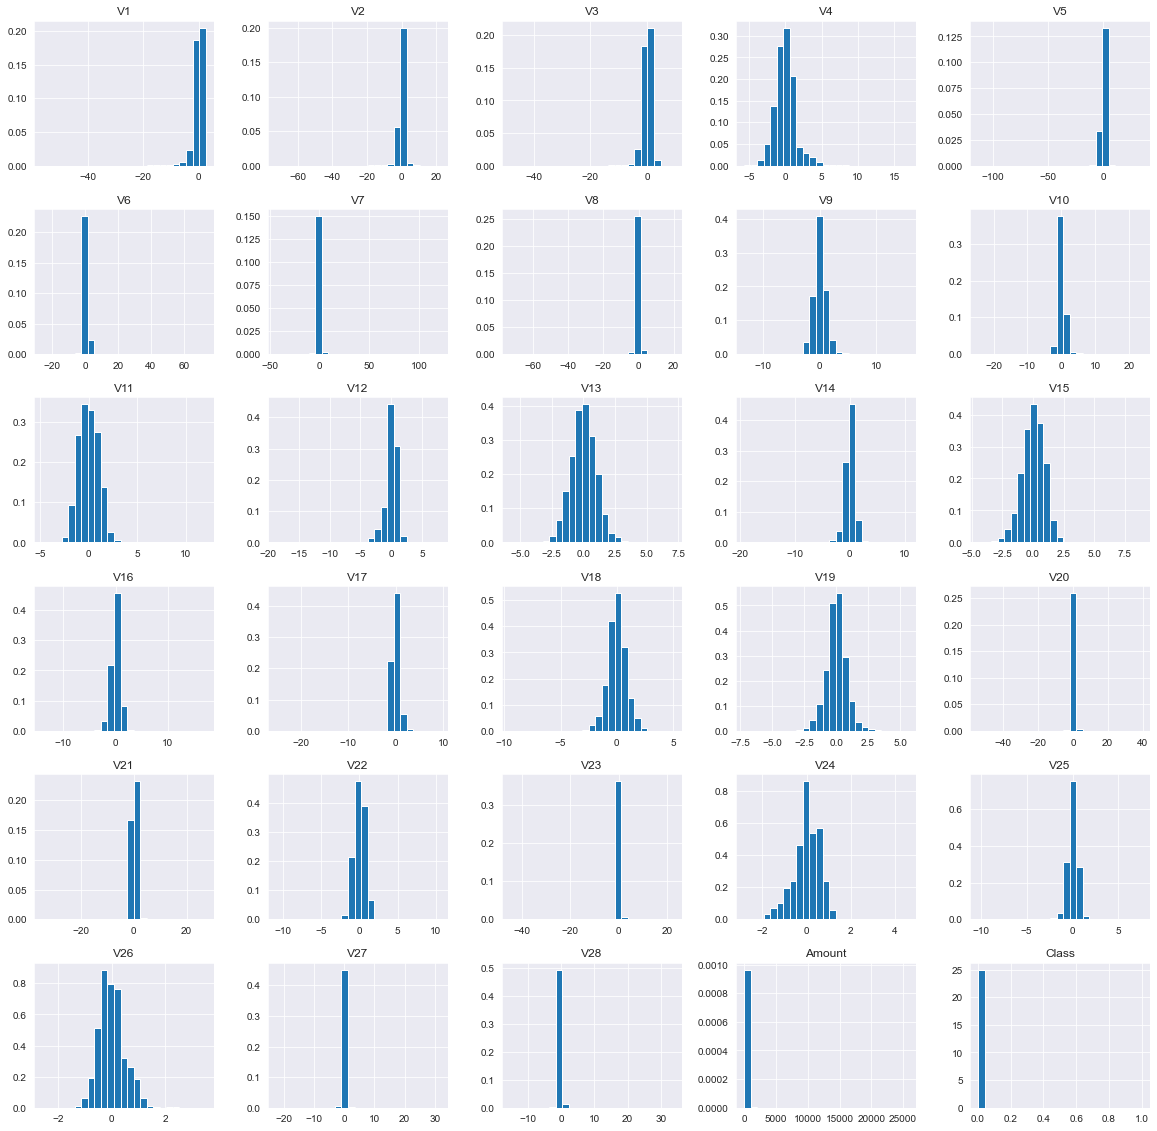

time: 4.31 s (started: 2021-06-14 13:56:46 +05:30)


In [26]:
# Lets check skewness of all the columns
df.hist(bins=25, figsize=(20,20), density=True)
plt.show()


In [27]:
#  Data preprocessing using PowerTransformer() 

from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer()
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)


X_train[cols] = pt.fit_transform(X_train)

time: 11.2 s (started: 2021-06-14 13:56:51 +05:30)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [28]:
# Fit and transform the PT on the training data
X_test = pt.transform(X_test)

time: 125 ms (started: 2021-06-14 13:57:02 +05:30)


In [29]:
print(X_test.shape)
print(X_train.shape)

(56962, 29)
(227845, 29)
time: 0 ns (started: 2021-06-14 13:57:02 +05:30)


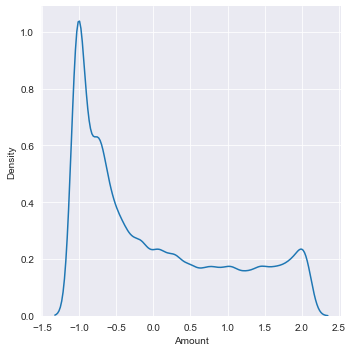

time: 1.09 s (started: 2021-06-14 13:57:02 +05:30)


In [30]:
# Again plot the histogram of a variable again to see the result
sns.displot(X_train, x='Amount', kind='kde')
plt.show()

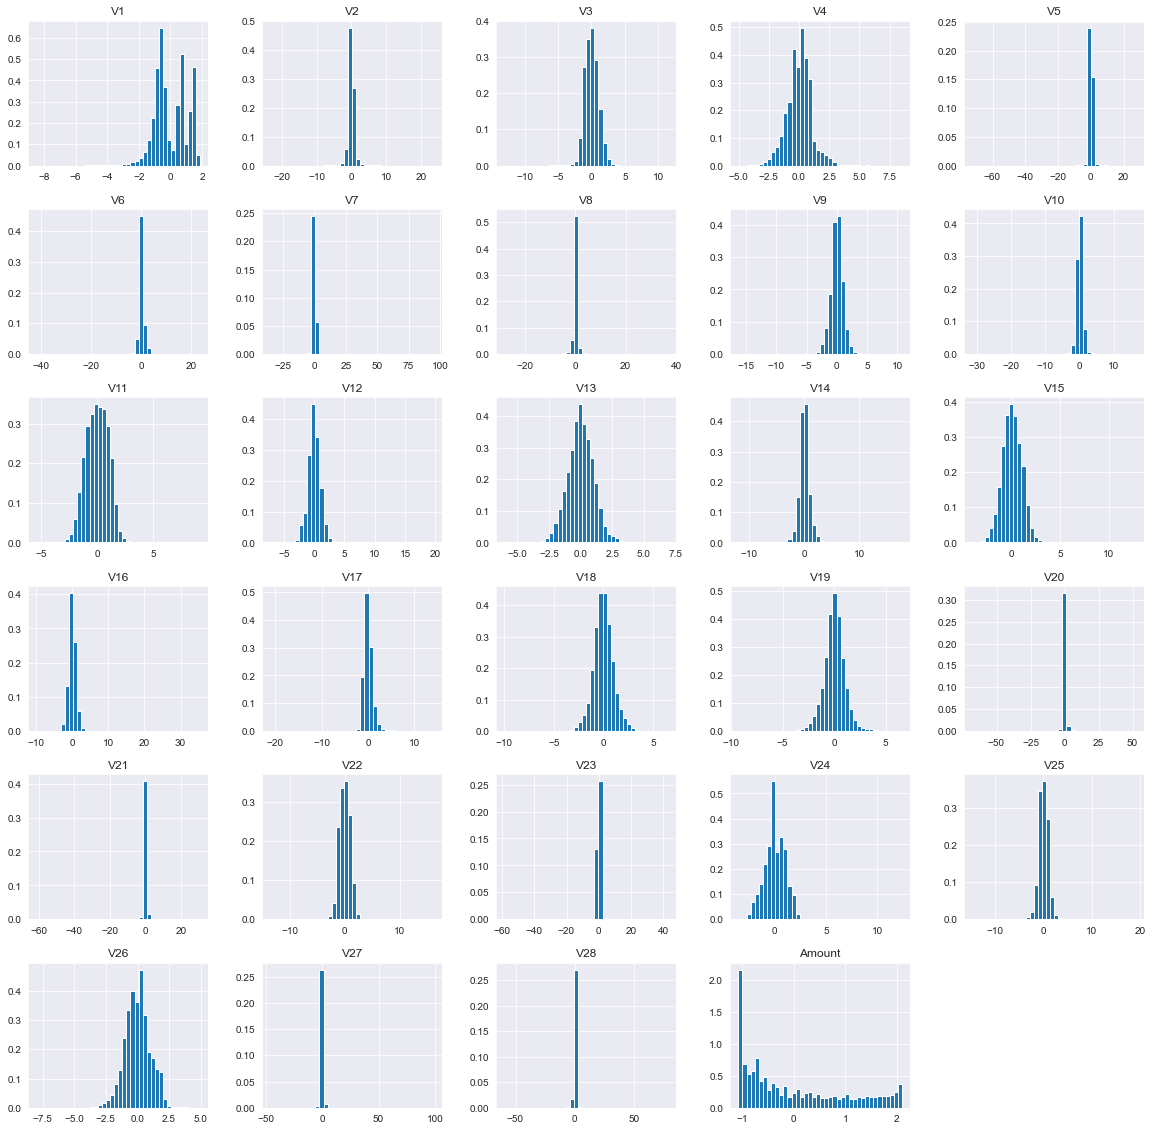

time: 4.72 s (started: 2021-06-14 13:57:03 +05:30)


In [31]:
# Lets check skewness of all the variables after using Power transformer
X_train.hist(bins=40, figsize=(20,20), density=True)
plt.show()

# Model Building on Imbalanced Data

### Cross Validation

In [32]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing import classifiers
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

time: 188 ms (started: 2021-06-14 13:57:08 +05:30)


In [33]:
models_to_compare = {'Logistic': LogisticRegression(class_weight='balanced'),
                     'DecisionTree':DecisionTreeClassifier(class_weight='balanced'),
                     'RandomForest':RandomForestClassifier(class_weight='balanced'),
                     'XGboost':XGBClassifier(class_weight='balanced')}

time: 0 ns (started: 2021-06-14 13:57:08 +05:30)


In [34]:
def model_compare(models,X, y,scoring = 'roc_auc'):
    
    model_res = []
    modnames = []
    
    print(scoring,'Comparison of all Models\n')
    # looping each model form the dictionary and performing cross validation
    for modname, model in models.items():
        kfold = KFold(n_splits=5, random_state= None)
        crossv = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        print(modname,': Mean-', round(crossv.mean(),2),' STD-' , round(crossv.std(),4))
        model_res.append(crossv)
        modnames.append(modname)
     
    model_res = pd.DataFrame(model_res,index = modnames )

time: 0 ns (started: 2021-06-14 13:57:08 +05:30)


In [35]:
model_compare(models_to_compare,X_train,y_train)

roc_auc Comparison of all Models

Logistic : Mean- 0.98  STD- 0.0065
DecisionTree : Mean- 0.87  STD- 0.0171
RandomForest : Mean- 0.95  STD- 0.0067


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost : Mean- 0.98  STD- 0.011
time: 10min 50s (started: 2021-06-14 13:57:08 +05:30)


CV results

roc_auc Comparison of all Models

Logistic : Mean- 0.98  STD- 0.0065
DecisionTree : Mean- 0.87  STD- 0.0171
RandomForest : Mean- 0.95  STD- 0.0067
XGboost : Mean- 0.98  STD- 0.011

### Decision Tree on IMB data

In [36]:
# Importing necessary libraries

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report




time: 0 ns (started: 2021-06-14 14:07:58 +05:30)


In [37]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(50, 100, 150),
    'min_samples_leaf': range(500, 1000, 2000),
    'min_samples_split': range(500, 1000, 2000),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 4, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(50, 100, 150),
                         'min_samples_leaf': range(500, 1000, 2000),
                         'min_samples_split': range(500, 1000, 2000)},
             scoring='roc_auc', verbose=1)

time: 51.6 s (started: 2021-06-14 14:07:58 +05:30)


In [38]:

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,9.368946,0.711106,0.02219,0.000826,50,500,500,"{'max_depth': 50, 'min_samples_leaf': 500, 'mi...",0.949662,0.945413,0.93931,0.94506,0.944861,0.003681,1


time: 16 ms (started: 2021-06-14 14:08:50 +05:30)


In [39]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9448610335485015
DecisionTreeClassifier(max_depth=50, min_samples_leaf=500,
                       min_samples_split=500, random_state=42)
time: 0 ns (started: 2021-06-14 14:08:50 +05:30)


In [40]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=300,
                                  min_samples_split=300)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=300,
                       min_samples_split=300, random_state=42)

time: 10.4 s (started: 2021-06-14 14:08:50 +05:30)


#### Predict on Train set


In [41]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

time: 31 ms (started: 2021-06-14 14:09:00 +05:30)


In [42]:

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227374     75]
 [   114    282]]
time: 156 ms (started: 2021-06-14 14:09:00 +05:30)


In [43]:
print("Model performance of Decision Tree on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))

Model performance of Decision Tree on IMB data

Accuracy:- 0.9991704887094297
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405
F1-Score:- 0.7490039840637449
Precision:- 0.7899159663865546
Recall:- 0.7121212121212122
time: 94 ms (started: 2021-06-14 14:09:01 +05:30)


In [44]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

time: 47 ms (started: 2021-06-14 14:09:01 +05:30)


In [45]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print('Auc for Decision Tree on IMB data:', auc)

Auc for Decision Tree on IMB data: 0.9765748629807167
time: 47 ms (started: 2021-06-14 14:09:01 +05:30)


In [46]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 14:09:01 +05:30)


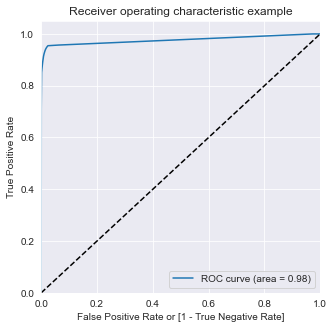

time: 235 ms (started: 2021-06-14 14:09:01 +05:30)


In [47]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Predict on Test set

In [48]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

time: 0 ns (started: 2021-06-14 14:09:01 +05:30)


In [49]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("\nModel performance of Decision Tree on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))

[[56836    30]
 [   40    56]]

Model performance of Decision Tree on IMB data

Accuracy:- 0.9987711105649381
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405
F1-Score:- 0.6153846153846155
Precision:- 0.7899159663865546
Recall:- 0.7121212121212122
time: 46 ms (started: 2021-06-14 14:09:01 +05:30)


In [50]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

time: 0 ns (started: 2021-06-14 14:09:01 +05:30)


In [51]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Decision Tree on IMB data:', auc)

Auc for Decision Tree on IMB data: 0.9233042554719281
time: 16 ms (started: 2021-06-14 14:09:01 +05:30)


In [52]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 14:09:01 +05:30)


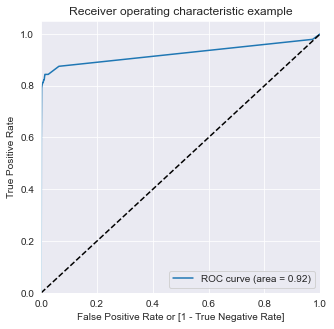

time: 156 ms (started: 2021-06-14 14:09:01 +05:30)


In [53]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

time: 0 ns (started: 2021-06-14 14:09:01 +05:30)


In [55]:
def draw_pr_rc( actual, probs ):
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    plt.figure(figsize = (10,5))
    auc_score_pr = metrics.auc(recall, precision)
    plt.plot(recall, precision, label='Pr-Rc curve (area = %0.2f)' %  auc_score_pr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('Precicion-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 14:09:01 +05:30)


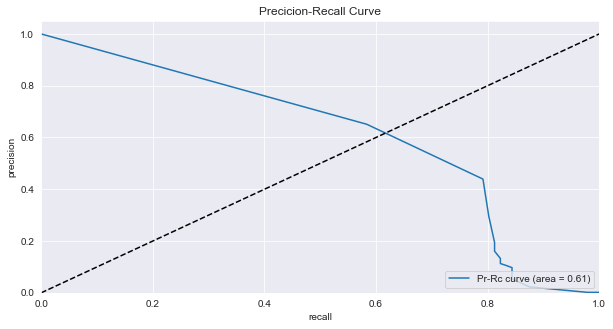

time: 157 ms (started: 2021-06-14 14:09:02 +05:30)


In [56]:
draw_pr_rc(y_test, y_test_pred_proba)

### Logistic Regression on IMB data


In [57]:

# Creating K-Fold with 5 splits

folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
 #= ______  #--> list of values
cv_num =   GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
cv_num.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

time: 32.2 s (started: 2021-06-14 14:09:02 +05:30)


In [58]:
# results of grid search CV
cv_results = pd.DataFrame(cv_num.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.672195,0.033146,0.020745,0.002705,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,...,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,0.865281,0.041668,0.023339,0.003254,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,...,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,0.968411,0.061627,0.024138,0.004058,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,...,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.003118,0.054399,0.021542,0.002999,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,...,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,0.974398,0.088399,0.024338,0.005410,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,...,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,1.034028,0.116198,0.023145,0.005399,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,...,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


time: 32 ms (started: 2021-06-14 14:09:34 +05:30)


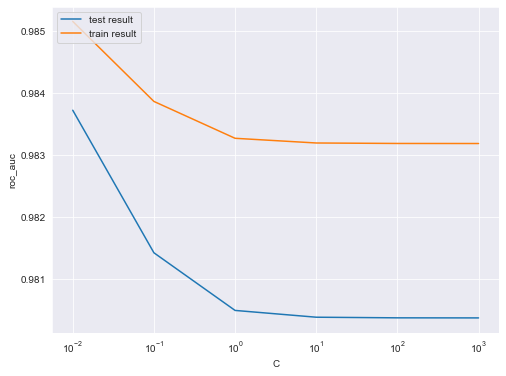

time: 1.05 s (started: 2021-06-14 14:09:34 +05:30)


In [59]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [60]:
# Best score with best C
best_score = cv_num.best_score_
best_C = cv_num.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01
time: 0 ns (started: 2021-06-14 14:09:35 +05:30)


In [61]:
# Instantiate the model with best C
logistic_1 = LogisticRegression(C=0.01)

time: 0 ns (started: 2021-06-14 14:09:35 +05:30)


In [62]:
# Fit the model on the train set
logistic_1_model = logistic_1.fit(X_train, y_train)

time: 672 ms (started: 2021-06-14 14:09:35 +05:30)


#### Predict on Train set


In [63]:
# Predictions on the train set
y_train_pred = logistic_1_model.predict(X_train)

time: 31 ms (started: 2021-06-14 14:09:36 +05:30)


In [64]:

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[227427     22]
 [   135    261]]
time: 219 ms (started: 2021-06-14 14:09:36 +05:30)


In [65]:
print("\nModel performance of Log Reg on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of Log Reg on IMB data

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388
Precision:- 0.9222614840989399
Recall:- 0.6590909090909091
time: 109 ms (started: 2021-06-14 14:09:36 +05:30)


In [66]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845

time: 344 ms (started: 2021-06-14 14:09:36 +05:30)


In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 14:09:36 +05:30)


In [68]:
y_train_pred_proba = logistic_1_model.predict_proba(X_train)[:,1]


time: 16 ms (started: 2021-06-14 14:09:36 +05:30)


In [69]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print('Auc for Log Reg on IMB data:', auc)

Auc for Log Reg on IMB data: 0.9850627519962183
time: 109 ms (started: 2021-06-14 14:09:36 +05:30)


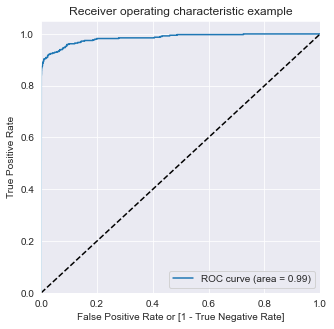

time: 343 ms (started: 2021-06-14 14:09:37 +05:30)


In [70]:
draw_roc(y_train, y_train_pred_proba)

#### Prediction on test data

In [71]:
# Prediction on the test set
y_test_pred = logistic_1_model.predict(X_test)

time: 0 ns (started: 2021-06-14 14:09:37 +05:30)


In [72]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("\nModel performance of Log Reg on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))

[[56850    16]
 [   42    54]]

Model performance of Log Reg on IMB data

Accuracy:- 0.9989817773252344
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.6506024096385543
Precision:- 0.9222614840989399
Recall:- 0.6590909090909091
time: 63 ms (started: 2021-06-14 14:09:37 +05:30)


In [73]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

time: 63 ms (started: 2021-06-14 14:09:37 +05:30)


In [74]:
# Predicted probability
y_test_pred_proba = logistic_1_model.predict_proba(X_test)[:,1]

time: 0 ns (started: 2021-06-14 14:09:37 +05:30)


In [75]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Log Reg on IMB data:', auc)

Auc for Log Reg on IMB data: 0.9668121475632775
time: 16 ms (started: 2021-06-14 14:09:37 +05:30)


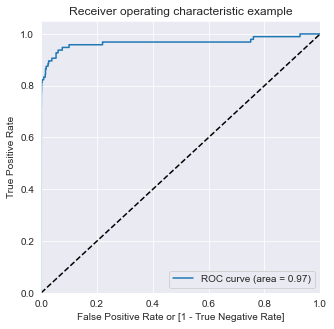

time: 235 ms (started: 2021-06-14 14:09:37 +05:30)


In [76]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

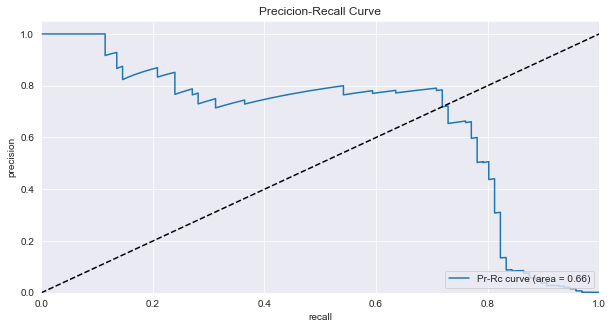

time: 172 ms (started: 2021-06-14 14:09:37 +05:30)


In [77]:
draw_pr_rc(y_test, y_test_pred_proba)

### Random Forest on IMB data

In [78]:
# Importing random forest classifier


time: 0 ns (started: 2021-06-14 14:09:38 +05:30)


In [79]:

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

time: 45min 37s (started: 2021-06-14 14:09:38 +05:30)


In [80]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.9992977681040323 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}
time: 0 ns (started: 2021-06-14 14:55:16 +05:30)


In [81]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

time: 0 ns (started: 2021-06-14 14:55:16 +05:30)


#### Predict on Train set

In [82]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

time: 2min 1s (started: 2021-06-14 14:55:16 +05:30)


In [83]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

time: 1.33 s (started: 2021-06-14 14:57:18 +05:30)


In [84]:

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227449      0]
 [     0    396]]
time: 156 ms (started: 2021-06-14 14:57:19 +05:30)


In [85]:
print("\nModel performance of Random Forest on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of Random Forest on IMB data

Accuracy:- 0.9993284908600145
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7957276368491321
Precision:- 1.0
Recall:- 1.0
time: 94 ms (started: 2021-06-14 14:57:19 +05:30)


In [86]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.84      0.75      0.80       396

    accuracy                           1.00    227845
   macro avg       0.92      0.88      0.90    227845
weighted avg       1.00      1.00      1.00    227845

time: 281 ms (started: 2021-06-14 14:57:19 +05:30)


In [87]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

time: 1.26 s (started: 2021-06-14 14:57:19 +05:30)


In [88]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print('Auc for Random Forest on IMB data:', auc)


Auc for Random Forest on IMB data: 0.9737485606163857
time: 63 ms (started: 2021-06-14 14:57:21 +05:30)


In [89]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 14:57:21 +05:30)


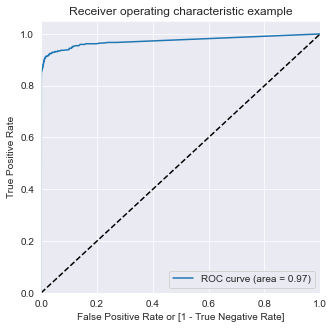

time: 235 ms (started: 2021-06-14 14:57:21 +05:30)


In [90]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Predict on Test set

In [91]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

time: 281 ms (started: 2021-06-14 14:57:21 +05:30)


In [92]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("\nModel performance of Random Forest on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))

[[56840    26]
 [   37    59]]

Model performance of Random Forest on IMB data

Accuracy:- 0.9988939995084443
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.6519337016574587
Precision:- 1.0
Recall:- 1.0
time: 63 ms (started: 2021-06-14 14:57:21 +05:30)


In [93]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

time: 281 ms (started: 2021-06-14 14:57:21 +05:30)


In [94]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Random Forest on IMB data:', auc)


Auc for Random Forest on IMB data: 0.9593616096026918
time: 15 ms (started: 2021-06-14 14:57:22 +05:30)


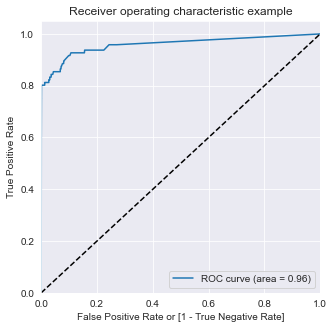

time: 172 ms (started: 2021-06-14 14:57:22 +05:30)


In [95]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

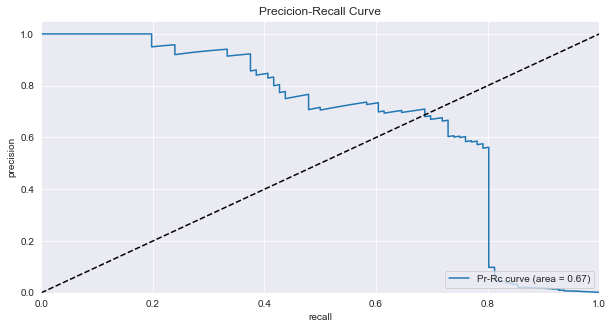

time: 140 ms (started: 2021-06-14 14:57:22 +05:30)


In [96]:
draw_pr_rc(y_test, y_test_pred_proba)

## XGBoost on IMB Data

In [97]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

time: 8min 24s (started: 2021-06-14 14:57:22 +05:30)


In [98]:

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,18.994197,0.363234,0.115026,4.629736e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,27.583742,0.203815,0.119680,2.973602e-07,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3,0.999966,0.999987,0.999966,0.999973,0.000010
2,33.469175,0.263544,0.119685,1.623340e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,18.554052,0.109537,0.122677,9.394296e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961154,0.974479,0.973310,0.969648,0.006025,6,0.999999,1.000000,0.999995,0.999998,0.000002
4,26.107026,0.293175,0.117353,5.776560e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965528,0.983906,0.973348,0.007748,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,31.752109,0.287812,0.119345,3.086982e-03,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


time: 31 ms (started: 2021-06-14 15:05:47 +05:30)


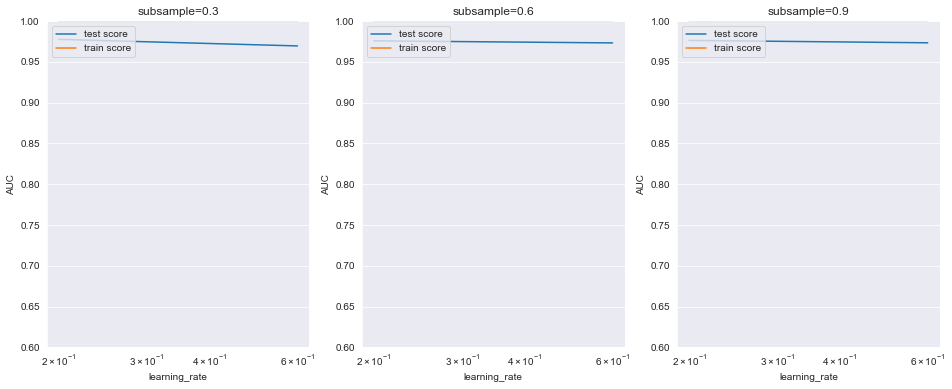

time: 969 ms (started: 2021-06-14 15:05:47 +05:30)


In [99]:

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [100]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

time: 15 ms (started: 2021-06-14 15:05:48 +05:30)


#### Predict on Train set


In [101]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,         
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_1 = XGBClassifier(params = params)
xgb_model_1.fit(X_train, y_train)

[15:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

time: 51.8 s (started: 2021-06-14 15:05:48 +05:30)


In [102]:
# Predictions on the train set
y_train_pred = xgb_model_1.predict(X_train)

time: 188 ms (started: 2021-06-14 15:06:40 +05:30)


In [103]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227449      0]
 [     0    396]]
time: 250 ms (started: 2021-06-14 15:06:40 +05:30)


In [104]:
print("\nModel performance of XGBoost on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of XGBoost on IMB data

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
Precision:- 1.0
Recall:- 1.0
time: 93 ms (started: 2021-06-14 15:06:40 +05:30)


In [105]:

# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

time: 297 ms (started: 2021-06-14 15:06:41 +05:30)


In [106]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_model_1.predict_proba(X_train)[:,1]

time: 141 ms (started: 2021-06-14 15:06:41 +05:30)


In [107]:

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
print('Auc for XGBoost on IMB data:', auc)


Auc for XGBoost on IMB data: 1.0
time: 125 ms (started: 2021-06-14 15:06:41 +05:30)


In [108]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 15:06:41 +05:30)


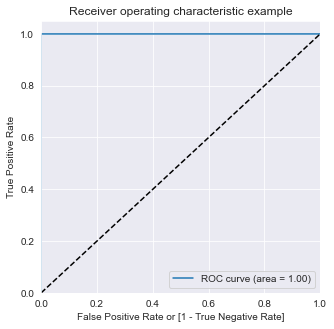

time: 312 ms (started: 2021-06-14 15:06:41 +05:30)


In [109]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Predict on Test set

In [110]:
# Predictions on the test set
y_test_pred = xgb_model_1.predict(X_test)


time: 47 ms (started: 2021-06-14 15:06:41 +05:30)


In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("\nModel performance of XGBoost on IMB data")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))

[[56859     7]
 [   24    72]]

Model performance of XGBoost on IMB data

Accuracy:- 0.9994557775359011
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8228571428571428
Precision:- 1.0
Recall:- 1.0
time: 109 ms (started: 2021-06-14 15:06:42 +05:30)


In [112]:
# Predicted probability
y_test_pred_proba = xgb_model_1.predict_proba(X_test)[:,1]

time: 47 ms (started: 2021-06-14 15:06:42 +05:30)


In [113]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for XGBoost on IMB data:', auc)


Auc for XGBoost on IMB data: 0.9785370798602564
time: 31 ms (started: 2021-06-14 15:06:42 +05:30)


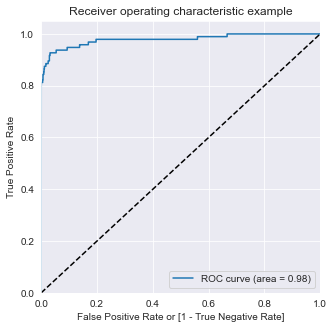

time: 250 ms (started: 2021-06-14 15:06:42 +05:30)


In [114]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

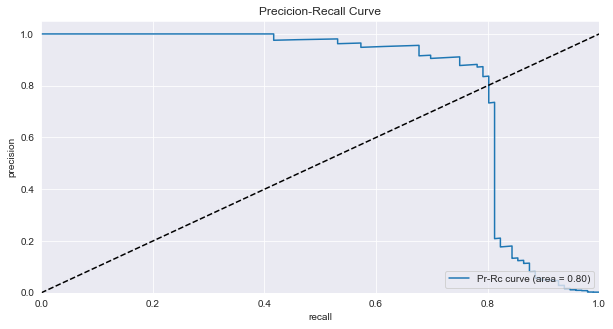

time: 172 ms (started: 2021-06-14 15:06:42 +05:30)


In [115]:
draw_pr_rc(y_test, y_test_pred_proba)

#### Over all the best model in IMB data

XGBoost

- Pr-Rc Curve : 0.80
- Roc Train : 1.0
- Roc Test : 0.98

- we have tried different algorithms on Imbalanced data i.e, (Logistic, XGBoost, Decision Tree, and Random Forest) almost all the models performed well.
- We can see Logistic Regression and XGBoost performed well on the Imbalanced data in terms of ROC-AUC score and Precision-Recall Curve.
- Among the two models, XGBoost is the best model which gives us ROC score of 1.0 on the train data and 0.98 on the test data and 0.80 on the Pr-Rc curve.
- Only concern on XgBoost is it requires a high resource utilization when compared to Logistic Regression. 
- XGBoost leads Logistic Regression model with a increase of 0.14 score in Pr-Rc curve which may help banks to save a lot of money.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [116]:
clf = xgb_model_1  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print(metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)) #print the evaluation score on the X_test by choosing the best evaluation metric

[15:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
time: 52 s (started: 2021-06-14 15:06:42 +05:30)


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


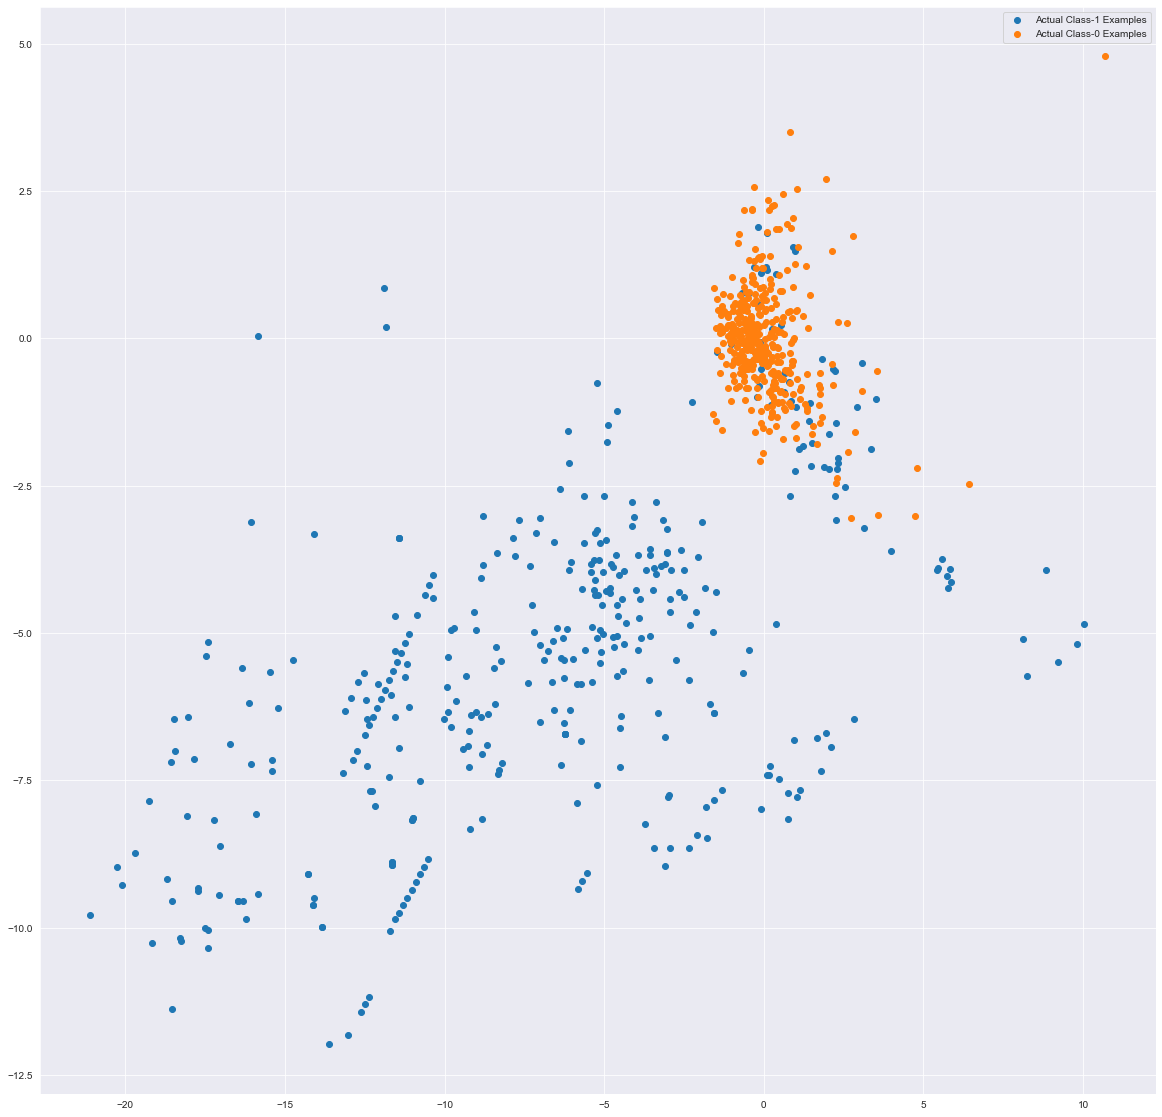

time: 797 ms (started: 2021-06-14 15:07:34 +05:30)


In [117]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Handling data imbalance

As we all know the dataset is highly imbalanced, lets use few techniques to balance the dataset.

#### RANDOM OVERSAMPLING
#### SMOTE
#### ADASYN




- Random Oversampling :- In this method, we will make the same count of non-fraudulent transctions as fraudulent transctions.

- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.

- Adasyn:- This is similar to SMOTE method with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

### RANDOM OVERSAMPLING

Lets us try Random Oversampling technique to balance the dataset and build some models to know its performance. 

### LOGISTIC REGRESSION ON RANDOM OVERSAMPLING

In [118]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


ros = RandomOverSampler()

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)



time: 969 ms (started: 2021-06-14 15:07:35 +05:30)


In [119]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})
time: 78 ms (started: 2021-06-14 15:07:36 +05:30)


In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 15:07:36 +05:30)


In [121]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model

model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

time: 58.5 s (started: 2021-06-14 15:07:36 +05:30)


In [122]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.511957,0.107690,0.043883,0.002092,0.01,{'C': 0.01},0.989104,0.988156,0.988303,0.988885,...,0.988573,0.000361,6,0.988488,0.988658,0.988618,0.988596,0.988579,0.988588,0.000056
1,1.672926,0.059368,0.043285,0.007125,0.1,{'C': 0.1},0.989113,0.988180,0.988333,0.988888,...,0.988589,0.000353,5,0.988513,0.988675,0.988633,0.988608,0.988590,0.988604,0.000053
2,1.692673,0.070921,0.037899,0.000631,1,{'C': 1},0.989114,0.988182,0.988332,0.988886,...,0.988589,0.000352,3,0.988515,0.988675,0.988633,0.988608,0.988591,0.988604,0.000053
3,1.655580,0.072159,0.043877,0.007107,10,{'C': 10},0.989114,0.988182,0.988332,0.988886,...,0.988589,0.000352,4,0.988515,0.988675,0.988633,0.988608,0.988590,0.988604,0.000053
4,1.660160,0.073383,0.042090,0.003303,100,{'C': 100},0.989113,0.988182,0.988332,0.988887,...,0.988589,0.000352,1,0.988515,0.988675,0.988633,0.988608,0.988591,0.988604,0.000053
5,1.645599,0.072985,0.043284,0.008663,1000,{'C': 1000},0.989113,0.988182,0.988332,0.988887,...,0.988589,0.000352,2,0.988515,0.988675,0.988633,0.988608,0.988591,0.988604,0.000053


time: 47 ms (started: 2021-06-14 15:08:35 +05:30)


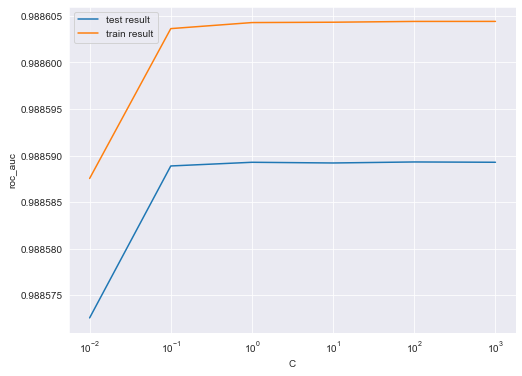

time: 875 ms (started: 2021-06-14 15:08:35 +05:30)


In [123]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [124]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885893182719162 at C = 100
time: 0 ns (started: 2021-06-14 15:08:36 +05:30)


#### Predict on Train set


In [125]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

time: 16 ms (started: 2021-06-14 15:08:36 +05:30)


In [126]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

time: 2.11 s (started: 2021-06-14 15:08:36 +05:30)


In [127]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

time: 47 ms (started: 2021-06-14 15:08:38 +05:30)


In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[222253   5196]
 [ 17783 209666]]
time: 437 ms (started: 2021-06-14 15:08:38 +05:30)


In [129]:
print("\nModel performance of Log Reg on RO")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of Log Reg on RO

Accuracy:- 0.949485379139939
Sensitivity:- 0.9218154399447789
Specificity:- 0.9771553183350993
F1-Score:- 0.9480478667724747
Precision:- 0.9758170360510467
Recall:- 0.9218154399447789
time: 172 ms (started: 2021-06-14 15:08:38 +05:30)


In [130]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

time: 610 ms (started: 2021-06-14 15:08:38 +05:30)


In [131]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

time: 47 ms (started: 2021-06-14 15:08:39 +05:30)


In [132]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print('Auc for Log Reg on RO:', auc)


Auc for Log Reg on RO: 0.988598295831143
time: 156 ms (started: 2021-06-14 15:08:39 +05:30)


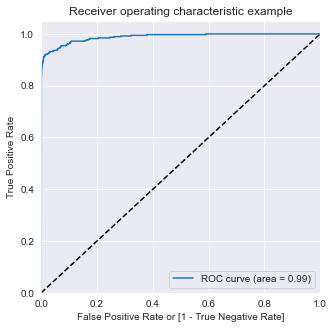

time: 422 ms (started: 2021-06-14 15:08:39 +05:30)


In [133]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Predict on Test set

In [134]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

time: 0 ns (started: 2021-06-14 15:08:40 +05:30)


In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[55536  1330]
 [   11    85]]
time: 47 ms (started: 2021-06-14 15:08:40 +05:30)


In [136]:
print("\nModel performance of Log Reg on RO")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of Log Reg on RO

Accuracy:- 0.9764579895368842
Sensitivity:- 0.8854166666666666
Specificity:- 0.9766116836070763
F1-Score:- 0.11250827266710788
Precision:- 0.06007067137809187
Recall:- 0.8854166666666666
time: 31 ms (started: 2021-06-14 15:08:40 +05:30)


In [137]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

time: 62 ms (started: 2021-06-14 15:08:40 +05:30)


In [138]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

time: 16 ms (started: 2021-06-14 15:08:40 +05:30)


In [139]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Log Reg on RO:', auc)


Auc for Log Reg on RO: 0.9707215574039554
time: 31 ms (started: 2021-06-14 15:08:40 +05:30)


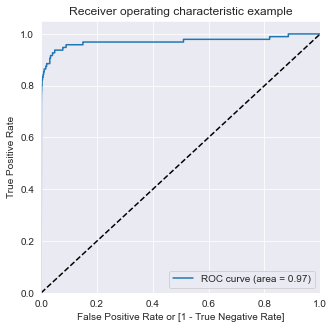

time: 234 ms (started: 2021-06-14 15:08:40 +05:30)


In [140]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

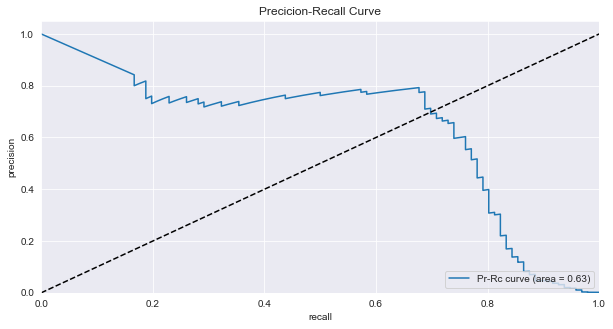

time: 188 ms (started: 2021-06-14 15:08:40 +05:30)


In [141]:
draw_pr_rc(y_test, y_test_pred_proba)

### XGBoost on RANDOM OVERSAMPLING

In [142]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model_ros = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model_ros, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

time: 13min 26s (started: 2021-06-14 15:08:40 +05:30)


In [143]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,32.853295,0.203103,0.199800,0.002049,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999898,0.999929,0.999912,0.999913,0.000013,5,0.999921,0.999937,0.999935,0.999931,7.185865e-06
1,42.206627,0.218952,0.197805,0.000940,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999914,0.999926,0.999893,0.999911,0.000013,6,0.999918,0.999923,0.999921,0.999920,2.055427e-06
2,47.030553,0.082768,0.197472,0.000814,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999911,0.999927,0.999909,0.999915,0.000008,4,0.999922,0.999926,0.999930,0.999926,3.518054e-06
3,32.733763,0.234117,0.197806,0.001244,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999990,0.999986,0.999971,0.999983,0.000008,3,1.000000,0.999998,0.999998,0.999999,1.047584e-06
4,42.125016,0.082303,0.201461,0.002820,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999997,0.999989,0.999979,0.999988,0.000007,1,0.999998,1.000000,1.000000,0.999999,1.093508e-06
5,46.807330,0.071338,0.195809,0.001244,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999994,0.999988,0.999971,0.999984,0.000010,2,0.999998,0.999999,1.000000,0.999999,7.820860e-07


time: 31 ms (started: 2021-06-14 15:22:07 +05:30)


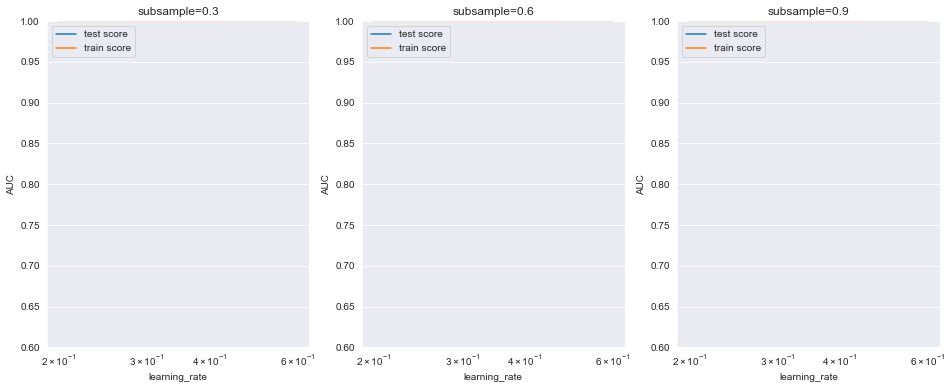

time: 969 ms (started: 2021-06-14 15:22:07 +05:30)


In [144]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [145]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

time: 0 ns (started: 2021-06-14 15:22:08 +05:30)


In [146]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model1 = XGBClassifier(params = params)
xgb_bal_ros_model1.fit(X_train_ros, y_train_ros)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

time: 1min 20s (started: 2021-06-14 15:22:08 +05:30)


#### Predict on Train set


In [147]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model1.predict(X_train_ros)

time: 406 ms (started: 2021-06-14 15:23:29 +05:30)


In [148]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227449      0]
 [     0 227449]]
time: 453 ms (started: 2021-06-14 15:23:29 +05:30)


In [149]:
print("\nModel performance of XGBoost on RO")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of XGBoost on RO

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
Precision:- 1.0
Recall:- 1.0
time: 203 ms (started: 2021-06-14 15:23:30 +05:30)


In [150]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

time: 641 ms (started: 2021-06-14 15:23:30 +05:30)


In [151]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model1.predict_proba(X_train_ros)[:,1]

time: 313 ms (started: 2021-06-14 15:23:30 +05:30)


In [152]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print('Auc for XGBoost on RO:', auc)

Auc for XGBoost on RO: 1.0
time: 188 ms (started: 2021-06-14 15:23:31 +05:30)


In [153]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 15:23:31 +05:30)


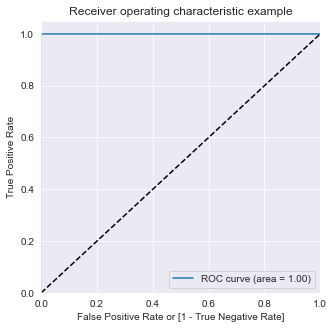

time: 422 ms (started: 2021-06-14 15:23:31 +05:30)


In [154]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Predict on Test set

In [155]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model1.predict(X_test)

time: 47 ms (started: 2021-06-14 15:23:31 +05:30)


In [156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[56857     9]
 [   19    77]]
time: 94 ms (started: 2021-06-14 15:23:31 +05:30)


In [157]:
print("\nModel performance of XGBoost on RO")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# Precision
print ("Precision:-", TP / float(TP+FP))

# Recall
print ("Recall:-", TP / float(TP+FN))


Model performance of XGBoost on RO

Accuracy:- 0.9995084442259752
Sensitivity:- 0.8020833333333334
Specificity:- 0.9998417331973412
F1-Score:- 0.8461538461538463
Precision:- 0.8953488372093024
Recall:- 0.8020833333333334
time: 31 ms (started: 2021-06-14 15:23:32 +05:30)


In [158]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.80      0.85        96

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

time: 63 ms (started: 2021-06-14 15:23:32 +05:30)


In [159]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model1.predict_proba(X_test)[:,1]

time: 47 ms (started: 2021-06-14 15:23:32 +05:30)


In [160]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for XGBoost on RO:', auc)


Auc for XGBoost on RO: 0.972437579866118
time: 31 ms (started: 2021-06-14 15:23:32 +05:30)


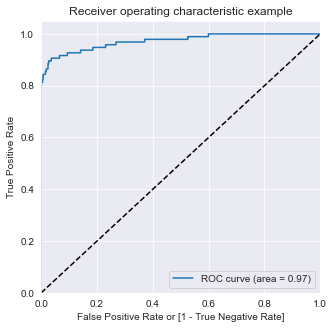

time: 218 ms (started: 2021-06-14 15:23:32 +05:30)


In [161]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


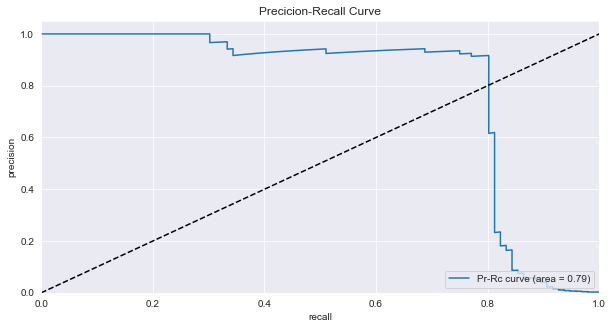

time: 156 ms (started: 2021-06-14 15:23:32 +05:30)


In [162]:
draw_pr_rc(y_test, y_test_pred_proba)

### Decision TREE on RANDOM OVERSAMPLING

In [163]:

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 20),
    'min_samples_leaf': range(500, 1500, 2000),
    'min_samples_split': range(500, 1000, 2000),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 20),
                         'min_samples_leaf': range(500, 1500, 2000),
                         'min_samples_split': range(500, 1000, 2000)},
             scoring='roc_auc', verbose=1)

time: 18.8 s (started: 2021-06-14 15:23:32 +05:30)


In [164]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.098031,0.00706,0.055865,0.000831,5,500,500,"{'max_depth': 5, 'min_samples_leaf': 500, 'min...",0.983111,0.98272,0.989525,0.985119,0.00312,1


time: 15 ms (started: 2021-06-14 15:23:51 +05:30)


In [165]:

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9851185482008784
DecisionTreeClassifier(max_depth=5, min_samples_leaf=500, min_samples_split=500)
time: 63 ms (started: 2021-06-14 15:23:51 +05:30)


In [166]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

time: 9.78 s (started: 2021-06-14 15:23:51 +05:30)


#### Predict on Train set


In [167]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

time: 78 ms (started: 2021-06-14 15:24:01 +05:30)


In [168]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[225919   1530]
 [     0 227449]]
time: 312 ms (started: 2021-06-14 15:24:01 +05:30)


In [169]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966366086463339
Sensitivity:- 1.0
Specificity:- 0.9932732172926678
time: 47 ms (started: 2021-06-14 15:24:01 +05:30)


In [170]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

time: 610 ms (started: 2021-06-14 15:24:01 +05:30)


In [171]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

time: 93 ms (started: 2021-06-14 15:24:02 +05:30)


In [172]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print('Auc for Decision Tree on RO:', auc)

Auc for Decision Tree on RO: 0.9997620326450715
time: 94 ms (started: 2021-06-14 15:24:02 +05:30)


In [173]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 15:24:02 +05:30)


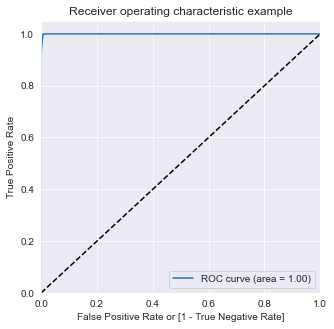

time: 297 ms (started: 2021-06-14 15:24:02 +05:30)


In [174]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Predict on Test set

In [175]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

time: 0 ns (started: 2021-06-14 15:24:03 +05:30)


In [176]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56436   430]
 [   20    76]]
time: 31 ms (started: 2021-06-14 15:24:03 +05:30)


In [177]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

time: 0 ns (started: 2021-06-14 15:24:03 +05:30)


In [178]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920999964888874
Sensitivity:- 0.7916666666666666
Specificity:- 0.9924383638729645
time: 0 ns (started: 2021-06-14 15:24:03 +05:30)


In [179]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.79      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962

time: 62 ms (started: 2021-06-14 15:24:03 +05:30)


In [180]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

time: 15 ms (started: 2021-06-14 15:24:03 +05:30)


In [181]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Decision Tree on RO:', auc)

Auc for Decision Tree on RO: 0.8948344573207189
time: 16 ms (started: 2021-06-14 15:24:03 +05:30)


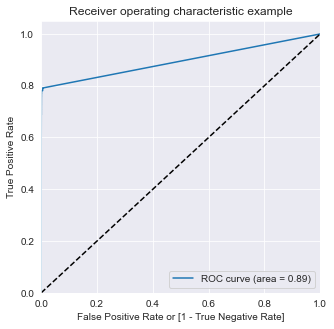

time: 157 ms (started: 2021-06-14 15:24:03 +05:30)


In [182]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

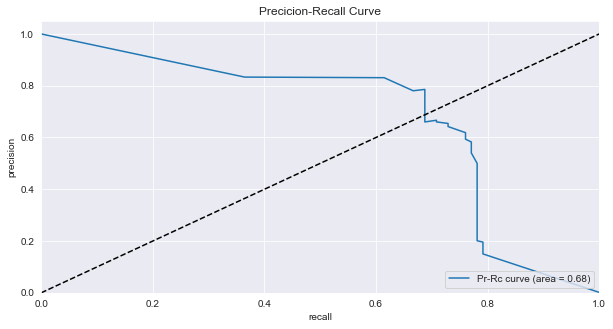

time: 156 ms (started: 2021-06-14 15:24:03 +05:30)


In [183]:
draw_pr_rc(y_test, y_test_pred_proba)

### Random Forest on RANDOM OVERSAMPLING

In [184]:

param_grid = {
    'max_depth': range(5,10,20),
    'min_samples_leaf': range(500, 1500, 2000),
    'min_samples_split': range(500, 1500, 2000),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 4,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_ros, y_train_ros)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 20),
                         'max_features': [10, 20],
                         'min_samples_leaf': range(500, 1500, 2000),
                         'min_samples_split': range(500, 1500, 2000),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

time: 1h 2min 16s (started: 2021-06-14 15:24:03 +05:30)


In [185]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.968832573242795 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 500, 'min_samples_split': 500, 'n_estimators': 300}
time: 0 ns (started: 2021-06-14 16:26:20 +05:30)


In [186]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

time: 0 ns (started: 2021-06-14 16:26:20 +05:30)


In [187]:
# Fit the model
rfc_imb_model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

time: 2min 34s (started: 2021-06-14 16:26:20 +05:30)


#### Predict on Train set

In [188]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train_ros)

time: 2.81 s (started: 2021-06-14 16:28:54 +05:30)


In [189]:

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[226813    636]
 [ 14299 213150]]
time: 281 ms (started: 2021-06-14 16:28:57 +05:30)


In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

time: 0 ns (started: 2021-06-14 16:28:57 +05:30)


In [191]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9671684641392136
Sensitivity:- 0.9371331595214751
Specificity:- 0.9972037687569522
F1-Score:- 0.9661518238580349
time: 219 ms (started: 2021-06-14 16:28:57 +05:30)


In [192]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    227449
           1       1.00      0.94      0.97    227449

    accuracy                           0.97    454898
   macro avg       0.97      0.97      0.97    454898
weighted avg       0.97      0.97      0.97    454898

time: 563 ms (started: 2021-06-14 16:28:57 +05:30)


In [193]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train_ros)[:,1]

time: 2.86 s (started: 2021-06-14 16:28:58 +05:30)


In [194]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print('Auc for Random Forest on RO:', auc)


Auc for Random Forest on RO: 0.9943590205867873
time: 109 ms (started: 2021-06-14 16:29:01 +05:30)


In [195]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 16:29:01 +05:30)


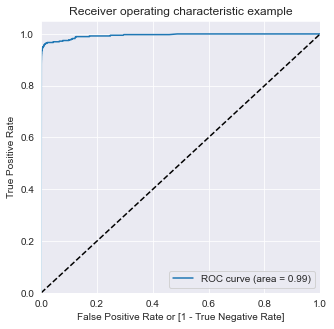

time: 328 ms (started: 2021-06-14 16:29:01 +05:30)


In [196]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Predict on Test set

In [197]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

time: 328 ms (started: 2021-06-14 16:29:01 +05:30)


In [198]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56658   208]
 [   17    79]]
time: 47 ms (started: 2021-06-14 16:29:02 +05:30)


In [199]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9960499982444436
Sensitivity:- 0.9371331595214751
Specificity:- 0.9972037687569522
F1-Score:- 0.412532637075718
time: 15 ms (started: 2021-06-14 16:29:02 +05:30)


In [200]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

time: 312 ms (started: 2021-06-14 16:29:02 +05:30)


In [201]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Random Forest on RO:', auc)


Auc for Random Forest on RO: 0.97243254243895
time: 16 ms (started: 2021-06-14 16:29:02 +05:30)


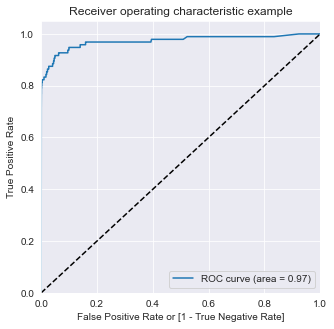

time: 172 ms (started: 2021-06-14 16:29:02 +05:30)


In [202]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

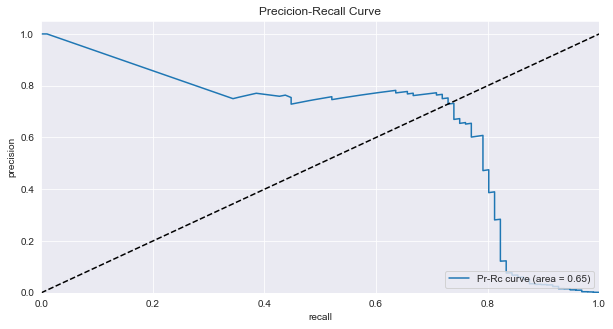

time: 156 ms (started: 2021-06-14 16:29:02 +05:30)


In [203]:
draw_pr_rc(y_test, y_test_pred_proba)

#### Over all the best model in RO

XGBoost

- Pr-Rc Curve : 0.77
- Roc Train : 1.0
- Roc Test : 0.97

## SMOTE

Lets us try SMOTE technique to balance the dataset and build some models to know its performance. 


In [204]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

time: 0 ns (started: 2021-06-14 16:29:03 +05:30)


In [205]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)


time: 0 ns (started: 2021-06-14 16:29:03 +05:30)


In [206]:
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

time: 640 ms (started: 2021-06-14 16:29:03 +05:30)


In [207]:

print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)
time: 0 ns (started: 2021-06-14 16:29:03 +05:30)


### LOGISTIC REGRESSION on SMOTE

In [208]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

time: 56.5 s (started: 2021-06-14 16:29:03 +05:30)


In [209]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.461282,0.079618,0.039896,0.000630,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,...,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,1.510561,0.059298,0.045086,0.003966,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,...,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,1.596529,0.101575,0.045080,0.004155,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,1.583165,0.072596,0.043883,0.004460,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,1.594536,0.074900,0.045279,0.004910,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,1.605706,0.042449,0.043891,0.005082,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


time: 47 ms (started: 2021-06-14 16:30:00 +05:30)


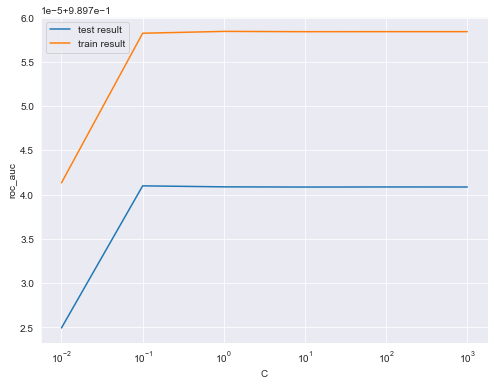

time: 891 ms (started: 2021-06-14 16:30:00 +05:30)


In [210]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [211]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1
time: 0 ns (started: 2021-06-14 16:30:01 +05:30)


In [212]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

time: 0 ns (started: 2021-06-14 16:30:01 +05:30)


In [213]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

time: 1.95 s (started: 2021-06-14 16:30:01 +05:30)


#### Predict on Train set


In [214]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

time: 46 ms (started: 2021-06-14 16:30:03 +05:30)


In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[221911   5538]
 [ 17693 209756]]
time: 391 ms (started: 2021-06-14 16:30:03 +05:30)


In [216]:
print("\nModel performance of Log Reg on SMOTE")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Log Reg on SMOTE

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603
time: 32 ms (started: 2021-06-14 16:30:03 +05:30)


In [217]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

time: 625 ms (started: 2021-06-14 16:30:03 +05:30)


In [218]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

time: 31 ms (started: 2021-06-14 16:30:04 +05:30)


In [219]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 16:30:04 +05:30)


In [220]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print('Auc for Log Reg on SMOTE:', auc)

Auc for Log Reg on SMOTE: 0.9943590205867873
time: 157 ms (started: 2021-06-14 16:30:04 +05:30)


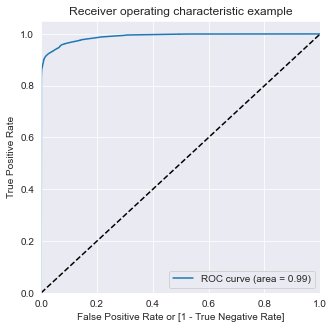

time: 453 ms (started: 2021-06-14 16:30:04 +05:30)


In [221]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Predict on Test set

In [222]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

time: 0 ns (started: 2021-06-14 16:30:05 +05:30)


In [223]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[55416  1450]
 [   10    86]]
time: 31 ms (started: 2021-06-14 16:30:05 +05:30)


In [224]:
print("\nModel performance of Log Reg on SMOTE")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Log Reg on SMOTE

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245
time: 0 ns (started: 2021-06-14 16:30:05 +05:30)


In [225]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

time: 78 ms (started: 2021-06-14 16:30:05 +05:30)


In [226]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

time: 0 ns (started: 2021-06-14 16:30:05 +05:30)


In [227]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Log Reg on SMOTE:', auc)

Auc for Log Reg on SMOTE: 0.9697428311000129
time: 16 ms (started: 2021-06-14 16:30:05 +05:30)


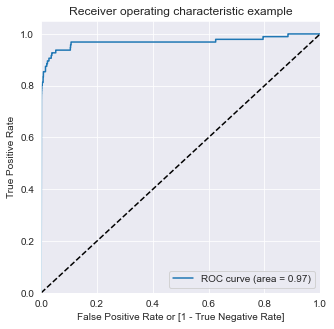

time: 218 ms (started: 2021-06-14 16:30:05 +05:30)


In [228]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

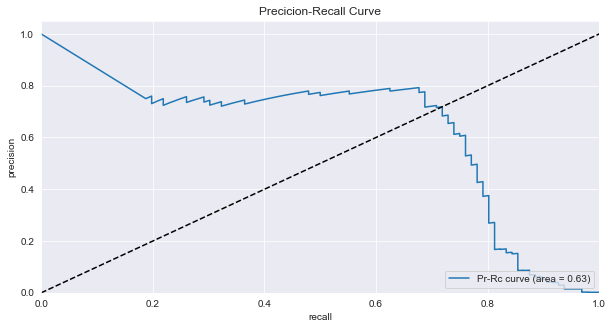

time: 172 ms (started: 2021-06-14 16:30:05 +05:30)


In [229]:
draw_pr_rc(y_test, y_test_pred_proba)

### XGboost on SMOTE

In [230]:
from xgboost import XGBClassifier
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.4], 
             'max_depth': [5, 10, 15]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

time: 53min 13s (started: 2021-06-14 16:30:05 +05:30)


In [231]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,81.075505,0.145423,0.230051,0.004700,0.1,5,"{'learning_rate': 0.1, 'max_depth': 5}",0.999871,0.999880,0.999872,0.999875,0.000004,9,0.999914,0.999912,0.999912,0.999913,7.769349e-07
1,141.199273,0.920093,0.302861,0.022976,0.1,10,"{'learning_rate': 0.1, 'max_depth': 10}",0.999992,0.999982,0.999975,0.999983,0.000007,7,1.000000,1.000000,1.000000,1.000000,1.503048e-08
2,165.320965,0.729941,0.299191,0.003245,0.1,15,"{'learning_rate': 0.1, 'max_depth': 15}",0.999992,0.999983,0.999980,0.999985,0.000005,6,1.000000,1.000000,1.000000,1.000000,5.581036e-10
3,80.373891,0.158406,0.220743,0.005890,0.2,5,"{'learning_rate': 0.2, 'max_depth': 5}",0.999980,0.999976,0.999977,0.999977,0.000002,8,0.999993,0.999993,0.999995,0.999993,8.602478e-07
4,121.155696,1.411426,0.288539,0.004973,0.2,10,"{'learning_rate': 0.2, 'max_depth': 10}",0.999995,0.999991,0.999986,0.999991,0.000004,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,142.866673,5.703499,0.341746,0.032247,0.2,15,"{'learning_rate': 0.2, 'max_depth': 15}",0.999995,0.999994,0.999988,0.999992,0.000003,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,79.213338,0.916379,0.229054,0.001244,0.4,5,"{'learning_rate': 0.4, 'max_depth': 5}",0.999994,0.999993,0.999986,0.999991,0.000004,4,1.000000,1.000000,1.000000,1.000000,2.050263e-11
7,96.981044,0.833039,0.280218,0.012215,0.4,10,"{'learning_rate': 0.4, 'max_depth': 10}",0.999995,0.999997,0.999990,0.999994,0.000003,1,1.000000,1.000000,1.000000,1.000000,6.409876e-17
8,97.488984,0.819381,0.277569,0.002335,0.4,15,"{'learning_rate': 0.4, 'max_depth': 15}",0.999995,0.999993,0.999988,0.999992,0.000003,3,1.000000,1.000000,1.000000,1.000000,6.409876e-17


time: 31 ms (started: 2021-06-14 17:23:19 +05:30)


In [232]:
model_cv.best_params_

{'learning_rate': 0.4, 'max_depth': 10}

time: 0 ns (started: 2021-06-14 17:23:19 +05:30)


In [233]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.4,
          'max_depth': 10, 
          'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.4, 'max_depth': 10,
                      'objective': 'binary:logistic'},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

time: 2min 24s (started: 2021-06-14 17:23:19 +05:30)


#### Predict on Train set


In [234]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

time: 453 ms (started: 2021-06-14 17:25:43 +05:30)


In [235]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227447      2]
 [     0 227449]]
time: 391 ms (started: 2021-06-14 17:25:43 +05:30)


In [236]:
print("\nModel performance of XGBoost on SMOTE")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of XGBoost on SMOTE

Accuracy:- 0.9999956034099952
Sensitivity:- 1.0
Specificity:- 0.9999912068199904
time: 47 ms (started: 2021-06-14 17:25:44 +05:30)


In [237]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

time: 594 ms (started: 2021-06-14 17:25:44 +05:30)


In [238]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

time: 282 ms (started: 2021-06-14 17:25:45 +05:30)


In [239]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print('Auc for XGBoost on SMOTE:', auc)

Auc for XGBoost on SMOTE: 1.0
time: 203 ms (started: 2021-06-14 17:25:45 +05:30)


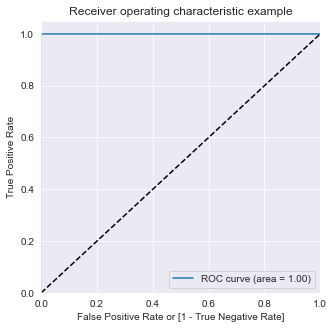

time: 391 ms (started: 2021-06-14 17:25:45 +05:30)


In [240]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Predict on Test set

In [241]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

time: 47 ms (started: 2021-06-14 17:25:45 +05:30)


In [242]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[56839    27]
 [   20    76]]
time: 94 ms (started: 2021-06-14 17:25:45 +05:30)


In [243]:
print("\nModel performance of XGBoost on SMOTE")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of XGBoost on SMOTE

Accuracy:- 0.9991748885221726
Sensitivity:- 0.7916666666666666
Specificity:- 0.9995251995920234
time: 0 ns (started: 2021-06-14 17:25:46 +05:30)


In [244]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.79      0.76        96

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962

time: 62 ms (started: 2021-06-14 17:25:46 +05:30)


In [245]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

time: 32 ms (started: 2021-06-14 17:25:46 +05:30)


In [246]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for XGBoost on SMOTE:', auc)

Auc for XGBoost on SMOTE: 0.9618437789423088
time: 31 ms (started: 2021-06-14 17:25:46 +05:30)


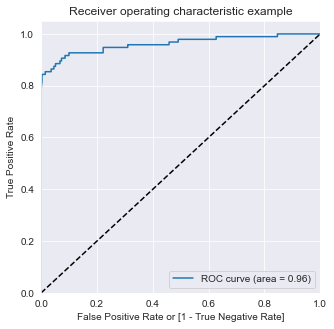

time: 203 ms (started: 2021-06-14 17:25:46 +05:30)


In [247]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

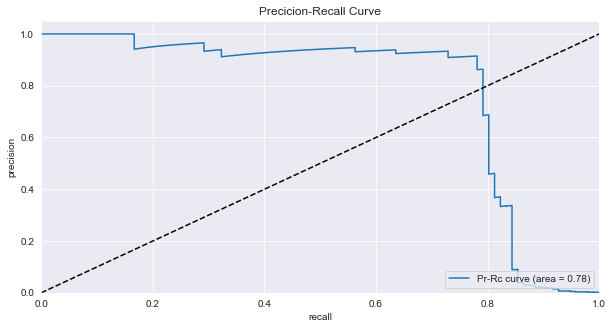

time: 156 ms (started: 2021-06-14 17:25:46 +05:30)


In [248]:
draw_pr_rc(y_test, y_test_pred_proba)

### Decision Tree on SMOTE

In [249]:
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(50, 150, 200),
    'min_samples_leaf': range(500, 1500, 2500),
    'min_samples_split': range(500, 1500, 2500),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(50, 150, 200),
                         'min_samples_leaf': range(500, 1500, 2500),
                         'min_samples_split': range(500, 1500, 2500)},
             scoring='roc_auc', verbose=1)

time: 1min 8s (started: 2021-06-14 17:25:46 +05:30)


In [250]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.213992,0.3006,0.062168,0.00047,50,500,500,"{'max_depth': 50, 'min_samples_leaf': 500, 'mi...",0.996908,0.99683,0.996711,0.996816,0.000081,1


time: 15 ms (started: 2021-06-14 17:26:55 +05:30)


In [251]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9968163517903168
DecisionTreeClassifier(max_depth=50, min_samples_leaf=500,
                       min_samples_split=500)
time: 0 ns (started: 2021-06-14 17:26:55 +05:30)


In [252]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=50, 
                                  min_samples_leaf=500,
                                  min_samples_split=500)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=500,
                       min_samples_split=500, random_state=100)

time: 25.9 s (started: 2021-06-14 17:26:55 +05:30)


#### Predict on Train set


In [253]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

time: 94 ms (started: 2021-06-14 17:27:21 +05:30)


In [254]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[222091   5358]
 [  5027 222422]]
time: 297 ms (started: 2021-06-14 17:27:21 +05:30)


In [255]:
print("\nModel performance of Decision Tree on SMOTE")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Decision Tree on SMOTE

Accuracy:- 0.977170706400116
Sensitivity:- 0.9778983420459092
Specificity:- 0.9764430707543229
time: 47 ms (started: 2021-06-14 17:27:21 +05:30)


In [256]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    227449
           1       0.98      0.98      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898

time: 594 ms (started: 2021-06-14 17:27:21 +05:30)


In [257]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

time: 94 ms (started: 2021-06-14 17:27:22 +05:30)


In [258]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print('Auc for Decision Tree on SMOTE:', auc)

Auc for Decision Tree on SMOTE: 0.9982308660083998
time: 94 ms (started: 2021-06-14 17:27:22 +05:30)


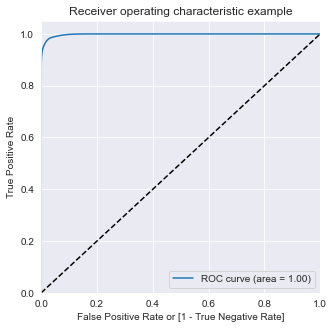

time: 281 ms (started: 2021-06-14 17:27:22 +05:30)


In [259]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Predict on Test set

In [260]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

time: 15 ms (started: 2021-06-14 17:27:22 +05:30)


In [261]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[55422  1444]
 [   17    79]]
time: 31 ms (started: 2021-06-14 17:27:22 +05:30)


In [262]:
print("\nModel performance of Decision Tree on SMOTE")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Decision Tree on SMOTE

Accuracy:- 0.9743513219339208
Sensitivity:- 0.8229166666666666
Specificity:- 0.9746069707733971
time: 0 ns (started: 2021-06-14 17:27:22 +05:30)


In [263]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.82      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.90      0.54     56962
weighted avg       1.00      0.97      0.99     56962

time: 62 ms (started: 2021-06-14 17:27:22 +05:30)


In [264]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

time: 15 ms (started: 2021-06-14 17:27:22 +05:30)


In [265]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Decision Tree on SMOTE:', auc)

Auc for Decision Tree on SMOTE: 0.9334761031782319
time: 16 ms (started: 2021-06-14 17:27:22 +05:30)


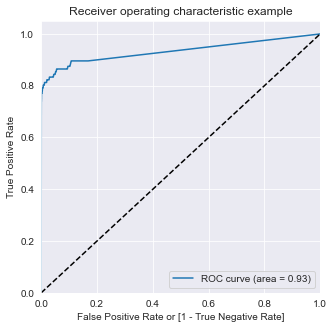

time: 157 ms (started: 2021-06-14 17:27:22 +05:30)


In [266]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

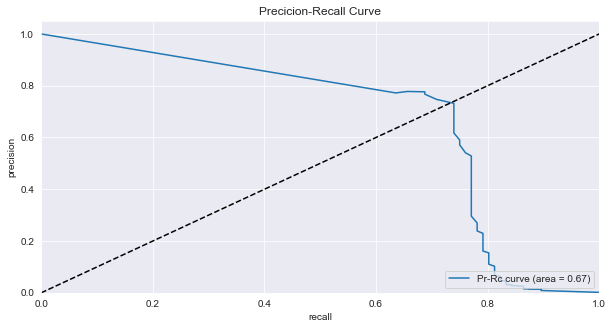

time: 156 ms (started: 2021-06-14 17:27:23 +05:30)


In [267]:
draw_pr_rc(y_test, y_test_pred_proba)

### RANDOM FOREST on SMOTE

In [268]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

time: 2h 3min 28s (started: 2021-06-14 17:27:23 +05:30)


In [269]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,276.909031,0.250826,3.833249,0.038399,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.953124,0.953321,0.953222,0.000099,18,0.952561,0.954508,0.953535,0.000974
1,556.367248,0.523599,7.142402,0.006482,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.953568,0.953546,0.953557,0.000011,15,0.952882,0.954583,0.953732,0.000851
2,838.594066,0.703618,10.757732,0.021441,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.953752,0.953453,0.953603,0.000149,13,0.953102,0.954654,0.953878,0.000776
3,276.955908,0.607874,3.764933,0.014962,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952961,0.952394,0.952677,0.000284,23,0.952367,0.953392,0.952880,0.000512
4,562.301882,0.076295,7.725841,0.005486,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.953625,0.953559,0.953592,0.000033,14,0.953031,0.954715,0.953873,0.000842
5,842.369967,1.653080,10.694903,0.020446,5,10,50,100,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952978,0.953638,0.953308,0.000330,17,0.952257,0.954790,0.953524,0.001266
6,281.217512,0.561997,4.101034,0.067819,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952596,0.953357,0.952976,0.000380,21,0.951928,0.954544,0.953236,0.001308
7,559.879858,0.108710,7.324913,0.170046,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952723,0.953427,0.953075,0.000352,20,0.952148,0.954561,0.953354,0.001207
8,859.182758,2.329771,11.514212,0.394947,5,10,100,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952983,0.953396,0.953190,0.000207,19,0.952306,0.954548,0.953427,0.001121
9,279.801299,0.132147,3.798343,0.010472,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952024,0.953255,0.952640,0.000616,24,0.951387,0.954385,0.952886,0.001499


time: 78 ms (started: 2021-06-14 19:30:51 +05:30)


In [270]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9549745217609222 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}
time: 0 ns (started: 2021-06-14 19:30:51 +05:30)


In [271]:
# model with the best hyperparameters

rf_bal_smote_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=100)

time: 0 ns (started: 2021-06-14 19:30:51 +05:30)


In [272]:
# Fit the model
rf_bal_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=100,
                       min_samples_split=100)

time: 12min 13s (started: 2021-06-14 19:30:51 +05:30)


#### Predict on Train set


In [273]:
# Predictions on the train set
y_train_pred = rf_bal_smote_model.predict(X_train_smote)

time: 4.11 s (started: 2021-06-14 19:43:04 +05:30)


In [274]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[225878   1571]
 [ 19020 208429]]
time: 406 ms (started: 2021-06-14 19:43:09 +05:30)


In [275]:
print("\nModel performance of Random Forest on SMOTE")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))


Model performance of Random Forest on SMOTE

Accuracy:- 0.954734907605661
Sensitivity:- 0.9163768581088507
Specificity:- 0.9930929571024714
F1-Score:- 0.9529293700522805
time: 266 ms (started: 2021-06-14 19:43:09 +05:30)


In [276]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    227449
           1       0.99      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.96      0.95      0.95    454898
weighted avg       0.96      0.95      0.95    454898

time: 812 ms (started: 2021-06-14 19:43:09 +05:30)


In [277]:
# Predicted probability
y_train_pred_proba = rf_bal_smote_model.predict_proba(X_train_smote)[:,1]

time: 4.06 s (started: 2021-06-14 19:43:10 +05:30)


In [278]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print('Auc for Random Forest on SMOTE:', auc)

Auc for Random Forest on SMOTE: 0.9912782884263853
time: 203 ms (started: 2021-06-14 19:43:14 +05:30)


In [279]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 19:43:14 +05:30)


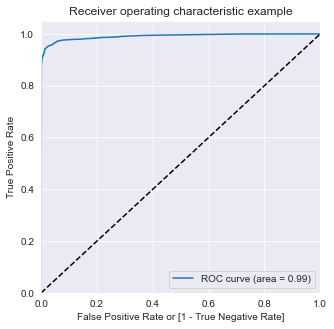

time: 500 ms (started: 2021-06-14 19:43:14 +05:30)


In [280]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Predict on Test set

In [281]:
# Predictions on the test set
y_test_pred = rf_bal_smote_model.predict(X_test)

time: 531 ms (started: 2021-06-14 19:43:15 +05:30)


In [282]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


print("\nModel performance of Random Forest on SMOTE")
# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

[[56391   475]
 [   19    77]]

Model performance of Random Forest on SMOTE

Accuracy:- 0.9913275517011341
Sensitivity:- 0.9163768581088507
Specificity:- 0.9930929571024714
F1-Score:- 0.23765432098765435
time: 94 ms (started: 2021-06-14 19:43:15 +05:30)


In [283]:
# Predicted probability
y_test_pred_proba = rf_bal_smote_model.predict_proba(X_test)[:,1]

time: 500 ms (started: 2021-06-14 19:43:16 +05:30)


In [284]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Random Forest on SMOTE:', auc)

Auc for Random Forest on SMOTE: 0.9818781763268034
time: 16 ms (started: 2021-06-14 19:43:16 +05:30)


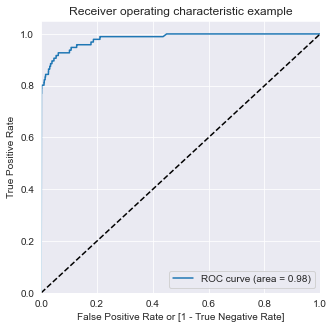

time: 344 ms (started: 2021-06-14 19:43:16 +05:30)


In [285]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

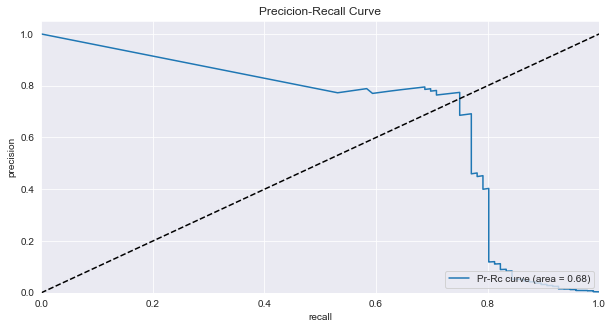

time: 312 ms (started: 2021-06-14 19:43:16 +05:30)


In [286]:
draw_pr_rc(y_test, y_test_pred_proba)

#### Overall the best model in SMOTE

XGBoost

- Pr-Rc Curve : 0.78
- Roc Train : 1.0
- Roc Test : 0.97

## ADASYN

Lets us try ADASYN technique to balance the dataset and build some models to know its performance. 


In [287]:
# Importing adasyn
from imblearn.over_sampling import ADASYN
from collections import Counter


time: 0 ns (started: 2021-06-14 19:43:17 +05:30)


In [288]:
# Instantiate adasyn
ada = ADASYN(random_state=27)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

time: 3.03 s (started: 2021-06-14 19:43:17 +05:30)


In [289]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})
time: 125 ms (started: 2021-06-14 19:43:20 +05:30)


### LOGISTIC REGRESSION on ADASYN

In [290]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

time: 37.9 s (started: 2021-06-14 19:43:20 +05:30)


In [291]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.568804,0.051712,0.090758,0.003256,0.01,{'C': 0.01},0.963678,0.962325,0.963377,0.963126,0.000580,6,0.962814,0.963400,0.963256,0.963157,0.000249
1,1.628645,0.062638,0.090094,0.005719,0.1,{'C': 0.1},0.963779,0.962429,0.963472,0.963227,0.000578,5,0.962926,0.963485,0.963354,0.963255,0.000239
2,1.743328,0.075945,0.084430,0.002037,1,{'C': 1},0.963785,0.962437,0.963477,0.963233,0.000577,4,0.962935,0.963491,0.963359,0.963262,0.000238
3,1.727049,0.128866,0.085438,0.004976,10,{'C': 10},0.963786,0.962437,0.963478,0.963234,0.000577,3,0.962936,0.963492,0.963359,0.963262,0.000237
4,1.750309,0.123312,0.086436,0.005298,100,{'C': 100},0.963786,0.962438,0.963478,0.963234,0.000577,2,0.962936,0.963492,0.963360,0.963263,0.000237
5,1.763960,0.118227,0.085437,0.006003,1000,{'C': 1000},0.963786,0.962438,0.963478,0.963234,0.000577,1,0.962936,0.963492,0.963360,0.963263,0.000237


time: 47 ms (started: 2021-06-14 19:43:58 +05:30)


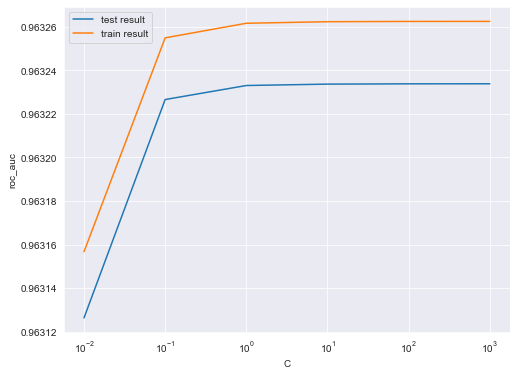

time: 1.48 s (started: 2021-06-14 19:43:58 +05:30)


In [292]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [293]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9632338656181682 at C = 1000
time: 0 ns (started: 2021-06-14 19:44:00 +05:30)


In [294]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

time: 0 ns (started: 2021-06-14 19:44:00 +05:30)


In [295]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

time: 2.34 s (started: 2021-06-14 19:44:00 +05:30)


#### Predict on Train set


In [296]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

time: 63 ms (started: 2021-06-14 19:44:02 +05:30)


In [297]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[207002  20447]
 [ 31041 196407]]
time: 468 ms (started: 2021-06-14 19:44:02 +05:30)


In [298]:
print("\nModel performance of Log Reg on ADASYN")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))


Model performance of Log Reg on ADASYN

Accuracy:- 0.8868139381002732
Sensitivity:- 0.8635248496359608
Specificity:- 0.9101029241720122
F1-Score:- 0.8841148588122494
time: 312 ms (started: 2021-06-14 19:44:03 +05:30)


In [299]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897

time: 906 ms (started: 2021-06-14 19:44:03 +05:30)


In [300]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

time: 62 ms (started: 2021-06-14 19:44:04 +05:30)


In [301]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print('Auc for Log Reg on ADASYN:', auc)

Auc for Log Reg on ADASYN: 0.9632629025072292
time: 250 ms (started: 2021-06-14 19:44:04 +05:30)


In [302]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 19:44:04 +05:30)


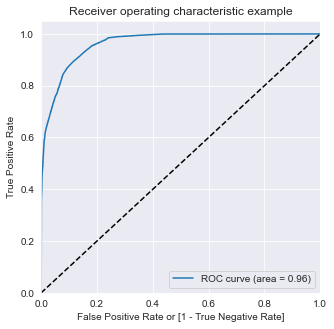

time: 625 ms (started: 2021-06-14 19:44:04 +05:30)


In [303]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Predict on Test set

In [304]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

time: 0 ns (started: 2021-06-14 19:44:05 +05:30)


In [305]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[51620  5246]
 [    4    92]]
time: 109 ms (started: 2021-06-14 19:44:05 +05:30)


In [306]:
print("\nModel performance of Log Reg on ADASYN")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Log Reg on ADASYN

Accuracy:- 0.9078332923703522
Sensitivity:- 0.9583333333333334
Specificity:- 0.907748039250167
time: 16 ms (started: 2021-06-14 19:44:05 +05:30)


In [307]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

time: 109 ms (started: 2021-06-14 19:44:05 +05:30)


In [308]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

time: 15 ms (started: 2021-06-14 19:44:05 +05:30)


In [309]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Log Reg on ADASYN:', auc)

Auc for Log Reg on ADASYN: 0.9671227278455784
time: 31 ms (started: 2021-06-14 19:44:05 +05:30)


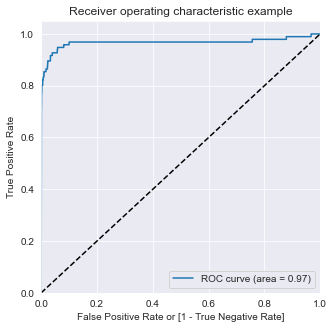

time: 343 ms (started: 2021-06-14 19:44:05 +05:30)


In [310]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

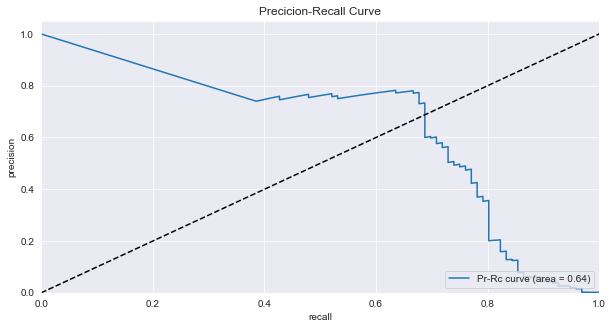

time: 266 ms (started: 2021-06-14 19:44:05 +05:30)


In [311]:
draw_pr_rc(y_test, y_test_pred_proba)

### XGBoost on ADASYN

In [312]:
# Importing XGBoost
from xgboost import XGBClassifier

time: 0 ns (started: 2021-06-14 19:44:06 +05:30)


In [313]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

time: 18min 51s (started: 2021-06-14 19:44:06 +05:30)


In [314]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,39.004125,2.270955,0.202131,0.017552,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.977713,0.996128,0.995301,0.989714,0.008493,3,0.999310,0.998968,0.999214,0.999164,0.000144
1,59.029666,1.388469,0.237369,0.011016,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976742,0.996314,0.994392,0.989149,0.008809,4,0.999335,0.999075,0.999183,0.999198,0.000107
2,71.179329,1.205089,0.215425,0.023361,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.976215,0.995499,0.994908,0.988874,0.008954,5,0.999319,0.999017,0.999285,0.999207,0.000135
3,41.069001,0.150092,0.202791,0.012196,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.976569,0.995430,0.997374,0.989791,0.009383,2,0.999947,0.999929,0.999957,0.999945,0.000012
4,57.533569,0.070126,0.209881,0.012438,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969246,0.997302,0.997241,0.987929,0.013211,6,0.999916,0.999943,0.999967,0.999942,0.000021
5,70.276848,0.297395,0.197805,0.002351,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.979154,0.998642,0.997101,0.991632,0.008846,1,0.999959,0.999958,0.999954,0.999957,0.000002


time: 31 ms (started: 2021-06-14 20:02:58 +05:30)


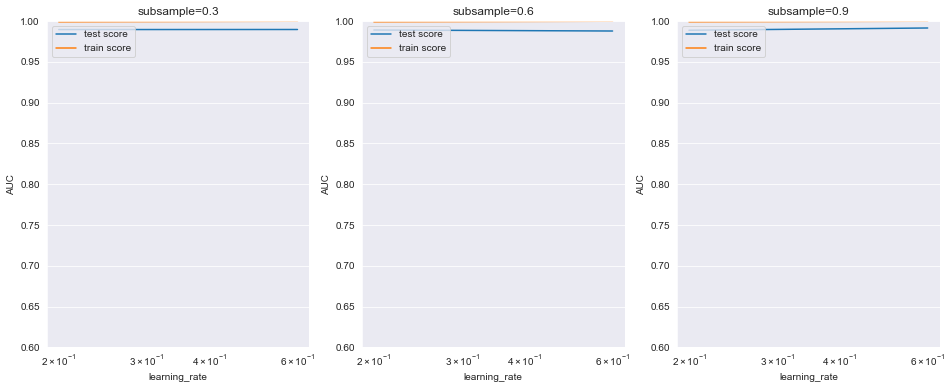

time: 1.56 s (started: 2021-06-14 20:02:58 +05:30)


In [315]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [316]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

time: 15 ms (started: 2021-06-14 20:02:59 +05:30)


In [317]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

time: 2min 29s (started: 2021-06-14 20:02:59 +05:30)


#### Predict on Train set


In [318]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

time: 437 ms (started: 2021-06-14 20:05:29 +05:30)


In [319]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227446      3]
 [     0 227448]]
time: 516 ms (started: 2021-06-14 20:05:30 +05:30)


In [320]:
print("\nModel performance of XGBoost on ADASYN")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of XGBoost on ADASYN

Accuracy:- 0.9999934051004953
Sensitivity:- 1.0
Specificity:- 0.9999868102299856
time: 46 ms (started: 2021-06-14 20:05:30 +05:30)


In [321]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897

time: 797 ms (started: 2021-06-14 20:05:30 +05:30)


In [322]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

time: 406 ms (started: 2021-06-14 20:05:31 +05:30)


In [323]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print('Auc for XGBoost on ADASYN:', auc)

Auc for XGBoost on ADASYN: 1.0
time: 235 ms (started: 2021-06-14 20:05:31 +05:30)


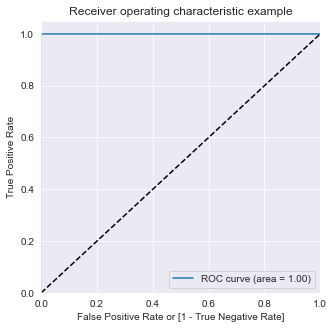

time: 578 ms (started: 2021-06-14 20:05:32 +05:30)


In [324]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Predict on Test set

In [325]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

time: 94 ms (started: 2021-06-14 20:05:32 +05:30)


In [326]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[56814    52]
 [   20    76]]
time: 109 ms (started: 2021-06-14 20:05:32 +05:30)


In [327]:
print("\nModel performance of XGBoost on ADASYN")


# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of XGBoost on ADASYN

Accuracy:- 0.998735999438222
Sensitivity:- 0.7916666666666666
Specificity:- 0.9990855695846376
time: 16 ms (started: 2021-06-14 20:05:33 +05:30)


In [328]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.59      0.79      0.68        96

    accuracy                           1.00     56962
   macro avg       0.80      0.90      0.84     56962
weighted avg       1.00      1.00      1.00     56962

time: 93 ms (started: 2021-06-14 20:05:33 +05:30)


In [329]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

time: 62 ms (started: 2021-06-14 20:05:33 +05:30)


In [330]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for XGBoost on ADASYN:', auc)

Auc for XGBoost on ADASYN: 0.9567415063482573
time: 31 ms (started: 2021-06-14 20:05:33 +05:30)


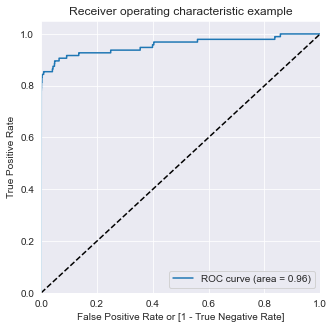

time: 343 ms (started: 2021-06-14 20:05:33 +05:30)


In [331]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


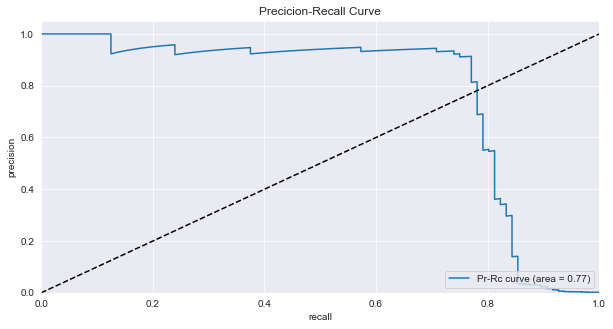

time: 266 ms (started: 2021-06-14 20:05:33 +05:30)


In [332]:
draw_pr_rc(y_test, y_test_pred_proba)

### DECISION TREE on ADASYN

In [333]:
from sklearn.tree import DecisionTreeClassifier

time: 0 ns (started: 2021-06-14 20:05:33 +05:30)


In [334]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(50, 150, 250),
    'min_samples_leaf': range(500, 1500, 2500),
    'min_samples_split': range(500, 1500, 2500),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(50, 150, 250),
                         'min_samples_leaf': range(500, 1500, 2500),
                         'min_samples_split': range(500, 1500, 2500)},
             scoring='roc_auc', verbose=1)

time: 1min 45s (started: 2021-06-14 20:05:33 +05:30)


In [335]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,23.119505,2.207932,0.099735,0.01762,50,500,500,"{'max_depth': 50, 'min_samples_leaf': 500, 'mi...",0.948116,0.97085,0.954915,0.95796,0.009528,1


time: 32 ms (started: 2021-06-14 20:07:19 +05:30)


In [336]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9579604698032579
DecisionTreeClassifier(max_depth=50, min_samples_leaf=500,
                       min_samples_split=500)
time: 15 ms (started: 2021-06-14 20:07:19 +05:30)


In [337]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=50, 
                                  min_samples_leaf=500,
                                  min_samples_split=500)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=500,
                       min_samples_split=500, random_state=100)

time: 36.9 s (started: 2021-06-14 20:07:19 +05:30)


#### Predict on Train set


In [338]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

time: 125 ms (started: 2021-06-14 20:07:56 +05:30)


In [339]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[219320   8129]
 [  5935 221513]]
time: 563 ms (started: 2021-06-14 20:07:56 +05:30)


In [340]:
print("\nModel performance of Decision Tree on ADASYN")


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Decision Tree on ADASYN
Accuracy:- 0.9690831111218584
Sensitivity:- 0.9739061235974816
Specificity:- 0.9642601198510435
time: 62 ms (started: 2021-06-14 20:07:57 +05:30)


In [341]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    227449
           1       0.96      0.97      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897

time: 1.05 s (started: 2021-06-14 20:07:57 +05:30)


In [342]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

time: 172 ms (started: 2021-06-14 20:07:58 +05:30)


In [343]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print('Auc for Decision Tree on ADASYN:', auc)

Auc for Decision Tree on ADASYN: 0.996830414715103
time: 203 ms (started: 2021-06-14 20:07:58 +05:30)


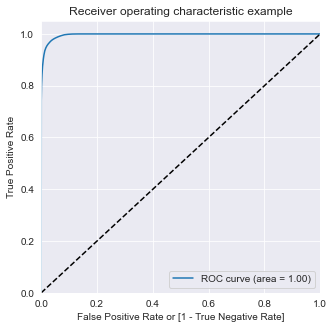

time: 546 ms (started: 2021-06-14 20:07:59 +05:30)


In [344]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Predict on Test set

In [345]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

time: 15 ms (started: 2021-06-14 20:07:59 +05:30)


In [346]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[54745  2121]
 [   21    75]]
time: 62 ms (started: 2021-06-14 20:07:59 +05:30)


In [347]:
print("\nModel performance of Decision Tree on ADASYN")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Model performance of Decision Tree on ADASYN

Accuracy:- 0.9623959832871036
Sensitivity:- 0.78125
Specificity:- 0.9627017901733901
time: 16 ms (started: 2021-06-14 20:07:59 +05:30)


In [348]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.78      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.87      0.52     56962
weighted avg       1.00      0.96      0.98     56962

time: 125 ms (started: 2021-06-14 20:07:59 +05:30)


In [349]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

time: 15 ms (started: 2021-06-14 20:07:59 +05:30)


In [350]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Decision Tree on ADASYN:', auc)

Auc for Decision Tree on ADASYN: 0.9312587193284799
time: 15 ms (started: 2021-06-14 20:07:59 +05:30)


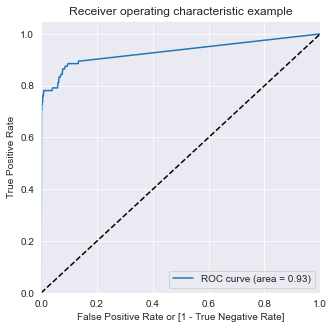

time: 344 ms (started: 2021-06-14 20:07:59 +05:30)


In [351]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

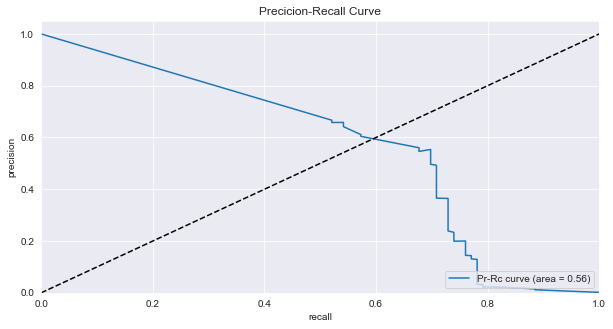

time: 313 ms (started: 2021-06-14 20:08:00 +05:30)


In [352]:
draw_pr_rc(y_test, y_test_pred_proba)

### RANDOM FOREST on ADASYN

In [353]:
param_grid = {
    'max_depth': range(5,10),
    'min_samples_leaf': range(50, 150, 250),
    'min_samples_split': range(50, 150, 250),
    'n_estimators': [100], 
    'max_features': [20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10), 'max_features': [20],
                         'min_samples_leaf': range(50, 150, 250),
                         'min_samples_split': range(50, 150, 250),
                         'n_estimators': [100]},
             return_train_score=True, verbose=1)

time: 35min 18s (started: 2021-06-14 20:08:00 +05:30)


In [354]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9026439640405861 using {'max_depth': 9, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
time: 0 ns (started: 2021-06-14 20:43:18 +05:30)


In [355]:
# model with the best hyperparameters

rf_bal_adasyn_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=100)

time: 0 ns (started: 2021-06-14 20:43:18 +05:30)


In [356]:
# Fit the model
rf_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=100,
                       min_samples_split=100)

time: 10min 33s (started: 2021-06-14 20:43:18 +05:30)


#### Predict on Train set


In [357]:
# Predictions on the train set
y_train_pred = rf_bal_adasyn_model.predict(X_train_adasyn)

time: 3.11 s (started: 2021-06-14 20:53:52 +05:30)


In [358]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[215516  11933]
 [ 16396 211052]]
time: 344 ms (started: 2021-06-14 20:53:55 +05:30)


In [359]:
print("\nModel performance of Random Forest on ADASYN")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))


Model performance of Random Forest on ADASYN

Accuracy:- 0.9377243639769003
Sensitivity:- 0.9279131933452921
Specificity:- 0.9475354914728137
F1-Score:- 0.9371071835322901
time: 172 ms (started: 2021-06-14 20:53:55 +05:30)


In [360]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    227449
           1       0.95      0.93      0.94    227448

    accuracy                           0.94    454897
   macro avg       0.94      0.94      0.94    454897
weighted avg       0.94      0.94      0.94    454897

time: 594 ms (started: 2021-06-14 20:53:55 +05:30)


In [361]:
# Predicted probability
y_train_pred_proba = rf_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

time: 3.16 s (started: 2021-06-14 20:53:56 +05:30)


In [362]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print('Auc for Random Forest on ADASYN:', auc)

Auc for Random Forest on ADASYN: 0.9854924362658976
time: 140 ms (started: 2021-06-14 20:53:59 +05:30)


In [363]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

time: 0 ns (started: 2021-06-14 20:53:59 +05:30)


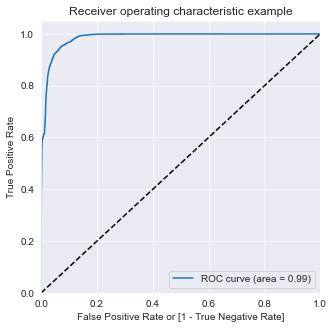

time: 375 ms (started: 2021-06-14 20:53:59 +05:30)


In [364]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Predict on Test set

In [365]:
# Predictions on the test set
y_test_pred = rf_bal_adasyn_model.predict(X_test)

time: 438 ms (started: 2021-06-14 20:54:00 +05:30)


In [366]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53806  3060]
 [   11    85]]
time: 47 ms (started: 2021-06-14 20:54:00 +05:30)


In [367]:
print("\nModel performance of Random Forest on ADASYN")

# Accuracy
print("\nAccuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))


Model performance of Random Forest on ADASYN

Accuracy:- 0.9460868649274955
Sensitivity:- 0.9279131933452921
Specificity:- 0.9475354914728137
F1-Score:- 0.05245294662141315
time: 15 ms (started: 2021-06-14 20:54:00 +05:30)


In [368]:
# Predicted probability
y_test_pred_proba = rf_bal_adasyn_model.predict_proba(X_test)[:,1]

time: 391 ms (started: 2021-06-14 20:54:00 +05:30)


In [369]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('Auc for Random Forest on ADASYN:', auc)

Auc for Random Forest on ADASYN: 0.9607947118371845
time: 15 ms (started: 2021-06-14 20:54:01 +05:30)


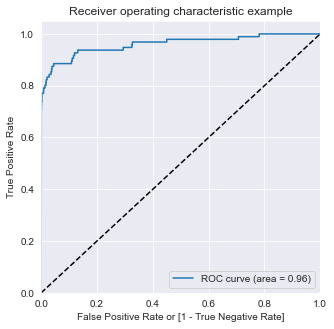

time: 187 ms (started: 2021-06-14 20:54:01 +05:30)


In [370]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

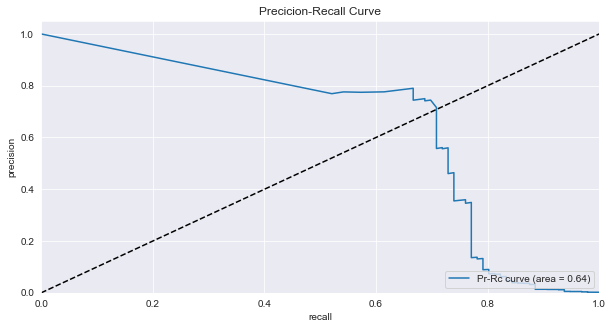

time: 172 ms (started: 2021-06-14 20:54:01 +05:30)


In [371]:
draw_pr_rc(y_test, y_test_pred_proba)

#### Overall the best model in ADASYN

XGBoost

- Pr-Rc Curve : 0.77
- Roc Train : 1.0
- Roc Test : 0.97

### Inference from all the models

- Among all the three methods like Random Oversampling, SMOTE, ADASYN. 
- SMOTE and Adasyn models almost performed good in the performance.
- XGBoost has acheived a ROC score 1.0 in the train set and 0.97 on the test set and 0.78 on the Pr-Rc curve by using SMOTE.
- We can choose the XGBoost on SMOTE is the best model which gives a higher score in Precicion-Recall curve when compared to   other models such as Logistic Regression or Random Forest. 


XGBoost on SMOTE

Pr-Rc Curve : 0.78, Roc Train : 1.0 &  Roc Test : 0.97

### Conclusion


- We can notice most of the models have performed more or less well in terms of ROC score, Precision and Recall on both balanced and imbalanced data. To be more specific on reducing the fraudulent transactions, we have tried different techniques to balance the dataset and found out the best performance of it.

- From Business prespective, Our best model is XGBoost though it may take a little higher computational resource it is worth to spend in infrastructure since our ultimate aim to save a lot of money.

- A minor increase in Pr-Rc curve can help banks to save a lot of money.

- In business point of view, we have to focus more on a High Recall score in order to detect actual fraudulent transactions on High value fradualent transactions.

- We can consider XGBoost on SMOTE is the best model which delivers good ROC score and also high score Pr-Rc curve and the second best XGBoost on ADASYN which delivers almost equal performance like SMOTE.
